In [274]:
%cd "C:\Users\rands\_Trading\Dividend_df\data"

C:\Users\rands\_Trading\Dividend_df\data


# 2.0 Data Wrangling

# Table of Contents<a id='#home'></a>
* [2.0 Data Wrangling](#data_w)
  * [2.1 Contents](#contents)
  * [2.2 Imports](#imports)
  * [2.3 Pulling in Data](#data_pull)
  * [2.4 Conclusion](#data_conclusion)


**Contents**<a id='contents'></a>

**This dataframe** ("df") **is purely to pull ALL combinations of 1 to 4 character's to then send as a "potential" traded equity ticker on the following exchanges**:

    * Dow Jones Indexes
    * S & P Indices
    * Nasdaq Stock Exchange

Please note, there are "other" possible ways to retrieve all of the traded equities in a simpler fashion but **this exercise was built to**:

    * Experiment in the Amazon Web Services ( "AWS" ) cloud computing platform
    
**Please note, if you try to run this code you will need to use both at different stages as you will get booted from `investpy` and `yfinance` due to overloading with requests::

    * Docker &
    * Any VPN 


**Imports**<a id='imports'></a>

Not much required.

In [275]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import string
import os
import investpy

# today info
from datetime import date
today = date.today()

# beautifulsoup
from bs4 import BeautifulSoup as bs
import requests

# progress bar
from tqdm import tqdm

# sleep 
from time import sleep

**Pulling in the Data**<a id='data_pull'></a>

Setting up **this is to pull the list of equities on the S&P 500 from the website listed above the code."**.

In [276]:
# the source
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

# pulling in the data
wiki_list = pd.read_html(url)

# making it a dataframe
wiki_df = wiki_list[0] 

In [277]:
wiki_df.head(2)

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916


In [278]:
# we only want the symbol to start; the others & more with yfinance
df_symb = pd.DataFrame([])
df_symb = pd.DataFrame(wiki_df['Symbol'])
df_symb.head(2)

,Symbol
0,MMM
1,AOS


In [279]:
# checking to see how many we have 
len(df_symb)

505

In [280]:
df_symb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Symbol  505 non-null    object
dtypes: object(1)
memory usage: 4.1+ KB


In [281]:
# converting it to a string
df_symb['Symbol'] = df_symb['Symbol'].astype('string')

In [282]:
df_symb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Symbol  505 non-null    string
dtypes: string(1)
memory usage: 4.1 KB


In [283]:
df_symb.head(2)

,Symbol
0,MMM
1,AOS


**Pulling in the dividends** with the help of yfinance.

In [284]:
# THIS IS THE YFINANCE STRUCTURE
sy = []
ln = []
div = []

# I will run a "for loop to pull the data"
for i in tqdm(range(0,len(df_symb))):
    ch = yf.Ticker(df_symb['Symbol'][i])
    
    if len(ch.info['logo_url'])>0:
        sy.append(ch.info['symbol'])                  
        ln.append(ch.info['longName'])
        div.append(ch.info['dividendRate'])


100%|██████████| 505/505 [43:39<00:00,  5.19s/it]


In [285]:
# sending both to a dataframe
df = pd.DataFrame([])
df['symbol'] = sy
df['name'] = ln
df['dividend'] = div

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   symbol    501 non-null    object 
 1   name      501 non-null    object 
 2   dividend  391 non-null    float64
dtypes: float64(1), object(2)
memory usage: 11.9+ KB


In [287]:
# dropping all those that aren't paying a dividend today
df_w_div = pd.DataFrame([])
df_w_div = df[df['dividend'].notna()]
df_w_div.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 500
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   symbol    391 non-null    object 
 1   name      391 non-null    object 
 2   dividend  391 non-null    float64
dtypes: float64(1), object(2)
memory usage: 12.2+ KB


In [288]:
print('After removing those that aren\'t paying a dividend now, have',len(df_w_div),'assets; representing',
     "{}%".format(round(((len(df_w_div)/len(df))*100),2)),'of the S&P 500')

After removing those that aren't paying a dividend now, have 391 assets; representing 78.04% of the S&P 500


In [289]:
df_w_div.head(3)

,symbol,name,dividend
0,MMM,3M Company,5.92
1,AOS,A. O. Smith Corporation,1.12
2,ABT,Abbott Laboratories,1.88


**Dow Jones**

We will undertake the same process with the Dow Jones Industrial Average.

In [290]:
d_wiki = 'https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average' 
d = pd.read_html(d_wiki)

In [291]:
d[1].head(3)

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,3.38%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,3.29%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,3.84%


In [292]:
# we only want the symbol to start; the others & more with yfinance
df_d_symb = pd.DataFrame([])
df_d_symb = pd.DataFrame(d[1]['Symbol'])
df_d_symb.head(2)

,Symbol
0,MMM
1,AXP


In [293]:
df_d_symb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Symbol  30 non-null     object
dtypes: object(1)
memory usage: 368.0+ bytes


Before we proceed, let's double check to see if there is any equity in the Dow that is not in the S&P 500.

In [294]:
df_d_symb['in_sp'] = df_d_symb.Symbol.isin(df.symbol).astype(object)

In [295]:
df_d_symb.head(2)

,Symbol,in_sp
0,MMM,True
1,AXP,True


In [296]:
print(len(df_d_symb) - df_d_symb['in_sp'].sum(),'| It appears there is one in the Dow Jones thats not in the original S&P 500 dataframe')

1 | It appears there is one in the Dow Jones thats not in the original S&P 500 dataframe


In [297]:
# showing which one
df_d_symb[df_d_symb.in_sp.astype(str).str.contains('False')]

,Symbol,in_sp
27,V,False


In [298]:
# lets check what it is & if it pays a dividend today :: first, send the symbol to a string
shrt_l = df_d_symb[df_d_symb.in_sp.astype(str).str.contains('False')]['Symbol'][27]
shrt_l = str(shrt_l)

# pull in the info from yfinance
shrt_l_yf = yf.Ticker(shrt_l)
shrt_n = shrt_l_yf.info['shortName']
shrt_d = shrt_l_yf.info['dividendRate']

# send to dataframe
shrt_df = pd.DataFrame([])
shrt_df['symbol'] = df_d_symb[df_d_symb.in_sp.astype(str).str.contains('False')]['Symbol']
shrt_df = shrt_df.reset_index()
shrt_df = shrt_df.drop(columns=['index'])
shrt_df['name'] = shrt_n
shrt_df['dividend'] = shrt_d

In [299]:
# sending to the df_w_div dataframe as it has a dividend but as a reminder that dataframe has...
print('Sending to the df_w_div dataframe as it has a dividend but as a reminder that dataframe has',len(df_w_div),
     'equities as it stands')

Sending to the df_w_div dataframe as it has a dividend but as a reminder that dataframe has 391 equities as it stands


In [300]:
# now sending to the main df called df_w_div
df_w_div = df_w_div.append(shrt_df, ignore_index = True)

In [301]:
df_w_div.tail(2)

,symbol,name,dividend
390,ZTS,Zoetis Inc.,1.3
391,V,Visa Inc.,NaN


Complete

**iShares Russell 1000 Value ETF**

Last but not least, the Value Index; this is different as it:

    * Will be handled with BeautifulSoup
    * Is much larger
    * Will be handled carefully

I will walk slowly.

In [302]:
# Establishing the url to which the information lays
v_index = 'https://www.ishares.com/us/products/239708/ishares-russell-1000-value-etf'.format(d)

In [303]:
rus = pd.read_excel('./IWD_holdings.xlsm')

In [304]:
rus.head(3)

,Ticker,Name,Sector,Asset Class,Market Value,Weight (%),Notional Value,Shares,Price,Location,Exchange,Currency,FX Rate,Market Currency,Accrual Date
0,BRKB,BERKSHIRE HATHAWAY INC CLASS B,Financials,Equity,1.592621e+09,2.64,1.592621e+09,5161964,308.53,United States,New York Stock Exchange Inc.,USD,1,USD,-
1,JPM,JPMORGAN CHASE & CO,Financials,Equity,1.386840e+09,2.30,1.386840e+09,8263364,167.83,United States,New York Stock Exchange Inc.,USD,1,USD,-
2,JNJ,JOHNSON & JOHNSON,Health Care,Equity,1.268650e+09,2.10,1.268650e+09,7415536,171.08,United States,New York Stock Exchange Inc.,USD,1,USD,-


In [305]:
rus_tick = pd.DataFrame([])
rus_tick = pd.DataFrame(rus['Ticker'])

In [306]:
rus_tick.head(3)

,Ticker
0,BRKB
1,JPM
2,JNJ


In [307]:
len(rus_tick)

859

In [308]:
rus_tick.head(3)

,Ticker
0,BRKB
1,JPM
2,JNJ


In [309]:
# we will see if these tickers are already in the
rus_tick['in_sp_df'] = rus_tick.Ticker.isin(df_symb.Symbol).astype(object)
rus_tick.head(10)

,Ticker,in_sp_df
0,BRKB,False
1,JPM,True
2,JNJ,True
3,UNH,True
4,PG,True
5,BAC,True
6,PFE,True
7,XOM,True
8,DIS,True
9,CSCO,True


In [310]:
print("{}%".format(round((rus_tick['in_sp_df'].sum() / len(rus_tick))*100,2)),'| are in the original dataframe')

49.36% | are in the original dataframe


We will drop all of those.

In [311]:
rus_tick_abb = pd.DataFrame([])
rus_tick_abb = rus_tick[rus_tick['in_sp_df'] == False]
rus_tick_abb.head()

,Ticker,in_sp_df
0,BRKB,False
59,MRVL,False
112,XTSLA,False
113,KKR,False
170,TWLO,False


In [312]:
rus_tick_abb = rus_tick_abb.reset_index()
rus_tick_abb = rus_tick_abb.drop(['index'],axis=1)
rus_tick_abb.head(3)

,Ticker,in_sp_df
0,BRKB,False
1,MRVL,False
2,XTSLA,False


In [313]:
# the above looks to be working; dropping the unwanted column
rus_tick_abb = rus_tick_abb.drop(['in_sp_df'],axis=1)
rus_tick_abb.head(3)

,Ticker
0,BRKB
1,MRVL
2,XTSLA


In [314]:
print(len(rus_tick_abb),'| the amount to send to yfinance (again)')

435 | the amount to send to yfinance (again)


In [315]:
# setting up seperate lists for all the items
sy_r = []
ln_r = []
div_r = []

# I will run a "for loop to pull the data"
for i in tqdm(range(0,len(rus_tick_abb))):
    ch = yf.Ticker(rus_tick_abb['Ticker'][i])
    
    if len(ch.info['logo_url'])>0:
        sy_r.append(ch.info['symbol'])
        ln_r.append(ch.info['longName'])
        div_r.append(ch.info['dividendRate'])


100%|██████████| 435/435 [43:44<00:00,  6.03s/it]


Sending the "selective Russell 500 Value Stocks" a dataframe.

In [316]:
# sending both to a dataframe
df_rus = pd.DataFrame([])
df_rus['symbol'] = sy_r
df_rus['name'] = ln_r
df_rus['dividend'] = div_r

In [317]:
df_rus.head(2)

,symbol,name,dividend
0,MRVL,"Marvell Technology, Inc.",0.24
1,KKR,KKR & Co. Inc.,0.58


In [318]:
df_rus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   symbol    422 non-null    object 
 1   name      422 non-null    object 
 2   dividend  239 non-null    float64
dtypes: float64(1), object(2)
memory usage: 10.0+ KB


Removing those that don't pay a dividend today.

In [319]:
# dropping all those that aren't paying a dividend today
rus_w_div = pd.DataFrame([])
rus_w_div = df_rus[df_rus['dividend'].notna()]
rus_w_div.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 0 to 418
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   symbol    239 non-null    object 
 1   name      239 non-null    object 
 2   dividend  239 non-null    float64
dtypes: float64(1), object(2)
memory usage: 7.5+ KB


In [320]:
rus_w_div.head()

,symbol,name,dividend
0,MRVL,"Marvell Technology, Inc.",0.24
1,KKR,KKR & Co. Inc.,0.58
3,WLTW,Willis Towers Watson Public Limited Company,3.20
4,INVH,Invitation Homes Inc.,0.68
5,KDP,Keurig Dr Pepper Inc.,0.75


Since we have now gone through all three (3), let's combine the following that both pay dividends before we move to the next section:

    * S&P 500 &
    * iShares Russell 1000 Value

As a reminder, the Dow didn't add anything new to the S&P 500; that's why there's only the two (2) above

In [321]:
df_w_div.head(1)

,symbol,name,dividend
0,MMM,3M Company,5.92


In [322]:
rus_w_div.head(1)

,symbol,name,dividend
0,MRVL,"Marvell Technology, Inc.",0.24


In [323]:
t_l = len(df_w_div) + len(rus_w_div)
print('Combining them both we should have',t_l,'equities for the next round')

Combining them both we should have 631 equities for the next round


Bringing them together

In [324]:
toppy = [df_w_div, rus_w_div]

df_bf = pd.concat(toppy)

In [325]:
#checking
len(df_bf)

631

In [326]:
df_bf = df_bf.reset_index()
df_bf = df_bf.drop(['index'],axis=1)
df_bf.head(3)

,symbol,name,dividend
0,MMM,3M Company,5.92
1,AOS,A. O. Smith Corporation,1.12
2,ABT,Abbott Laboratories,1.88


**Looking into the Past**

Now that we have all the equities that pay a dividend "today", I will now investigate what has happened in the past ~30 years,

    * i.e. since 1 Jan 1990 until now


In [327]:
# setting up seperate lists for all the items
d_sy = []
d_ch = []

# I will run a "for loop to pull the data"
for i in tqdm(range(0,len(df_bf))):
    
    if df_bf['symbol'][i] == 'WSO':
        continue
    
    else:
        
        e = yf.Ticker(df_bf['symbol'][i])

        if len(e.info['logo_url'])>0:
            sy_date = e.history(start="1990-01-01",  end=today)
            sy_date = sy_date.reset_index()
            early_d = sy_date['Date'][0].year
            d_ch.append(early_d)
            d_sy.append(e.info['symbol'])


100%|██████████| 631/631 [1:15:44<00:00,  7.20s/it]


In [328]:
shrt_df = pd.DataFrame([])
shrt_df['symbol'] = d_sy
shrt_df['history_yr'] = d_ch
shrt_df.head(3)

,symbol,history_yr
0,MMM,1990
1,AOS,1990
2,ABT,1990


In [329]:
shrt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   symbol      629 non-null    object
 1   history_yr  629 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [330]:
shrt_df.describe()

,history_yr
count,629.000000
mean,1996.901431
std,9.280989
min,1990.000000
25%,1990.000000
50%,1991.000000
75%,2003.000000
max,2021.000000


In [331]:
print('The data looks as though most of equities that pay dividends went that far back in trading but','\n','shrt_df is missing',
     len(df_bf)-len(shrt_df),'equities which I will address next')

The data looks as though most of equities that pay dividends went that far back in trading but 
 shrt_df is missing 2 equities which I will address next


In [332]:
# setting up a side dataframe to ascertain what is missing
temp_df = pd.DataFrame([])
temp_df = df_bf.copy()

# set up the "unique symbols in "df_bf" compared to "shrt_df" & then handle
temp_df['has'] = temp_df.symbol.isin(d_sy)

# showing those missing from 'shrt_df'
temp_df[ temp_df['has'] == False ]

,symbol,name,dividend,has
391,V,Visa Inc.,NaN,False
429,WSO,"Watsco, Inc.",7.8,False


In [333]:
# a new dataframe w/ only the missing ones
missing_df = pd.DataFrame([])
missing_df = temp_df[ temp_df['has'] == False ]
missing_df = missing_df.reset_index()
missing_df = missing_df.drop(['index'],axis=1)
missing_df.head()

,symbol,name,dividend,has
0,V,Visa Inc.,NaN,False
1,WSO,"Watsco, Inc.",7.8,False


Manually one by one.

In [334]:
e = yf.Ticker(df_bf['symbol'][i])

In [335]:
# setting up seperate lists for all the items
miss_sy = []
miss_ch = []

# I will run a "for loop to pull the data"
for i in tqdm(range(0,len(missing_df))):
    e = yf.Ticker(missing_df['symbol'][i])
    
    if len(e.info['logo_url'])>0:
        sy_date = e.history(start="1990-01-01",  end=today)
        sy_date = sy_date.reset_index()
        early_d = sy_date['Date'][0].year
        miss_ch.append(early_d)
        miss_sy.append(e.info['symbol']) # df_bf['symbol'][i]


100%|██████████| 2/2 [00:15<00:00,  7.52s/it]


Two of them comply with the 1990 date

In [336]:
shrt_df_ex = pd.DataFrame([])
shrt_df_ex['symbol'] = miss_sy
shrt_df_ex['history_yr'] = miss_ch
shrt_df_ex.head()

,symbol,history_yr
0,WSO,1990


In [337]:
shrt_df_final = pd.DataFrame([])
shrt_df_final = shrt_df.copy()
shrt_df_final = shrt_df_final.append(shrt_df_ex)
shrt_df_final = shrt_df_final.reset_index()
shrt_df_final = shrt_df_final.drop(['index'],axis=1)
len(shrt_df_final)

630

Worked. I'm going to make the name of it shorter as I don't like very long dataframe names.

In [338]:
df_sf = pd.DataFrame([])
df_sf = shrt_df_final.copy()
df_sf.head(3)

,symbol,history_yr
0,MMM,1990
1,AOS,1990
2,ABT,1990


**Next step, add the "history_yr" column to "df_bf"** but they aren't on the same arrangement so it must be done based on matching.

In [339]:
df_p = pd.DataFrame([])
df_p = pd.merge(df_bf, df_sf, on=['symbol'], how='left')
df_p.head(3)

,symbol,name,dividend,history_yr
0,MMM,3M Company,5.92,1990.0
1,AOS,A. O. Smith Corporation,1.12,1990.0
2,ABT,Abbott Laboratories,1.88,1990.0


In [340]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631 entries, 0 to 630
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   symbol      631 non-null    object 
 1   name        631 non-null    object 
 2   dividend    630 non-null    float64
 3   history_yr  630 non-null    float64
dtypes: float64(2), object(2)
memory usage: 24.6+ KB


Do we have an equal number of columns from expected?

In [341]:
print(len(df_p)-len(df_bf),'| Confirmed; we do')

0 | Confirmed; we do


**Now dropping all equities that haven't even reported during our time horizon.**

In [342]:
df_prep = pd.DataFrame([])
df_prep = df_p[df_p['history_yr'] == 1990]
df_prep = df_prep.reset_index()
df_prep = df_prep.drop(['index'],axis=1)

In [343]:
len(df_prep)

315

In [344]:
df_prep.describe()

,dividend,history_yr
count,315.000000,315.0
mean,2.133778,1990.0
std,1.690872,0.0
min,0.010000,1990.0
25%,0.960000,1990.0
50%,1.680000,1990.0
75%,2.800000,1990.0
max,11.200000,1990.0


In [345]:
print('That looks right; we now have',"{}%".format(round((len(df_prep)/len(df_bf))*100,2)),'of the original dataframe ( which is okay )')

That looks right; we now have 49.92% of the original dataframe ( which is okay )


In [346]:
df_prep.head(3)

,symbol,name,dividend,history_yr
0,MMM,3M Company,5.92,1990.0
1,AOS,A. O. Smith Corporation,1.12,1990.0
2,ABT,Abbott Laboratories,1.88,1990.0


We now no longer need the `history_yr` column so it will be dropped.

In [347]:
df_prep = df_prep.drop(columns=['history_yr'], axis=1)

In [348]:
df_prep.head(3)

,symbol,name,dividend
0,MMM,3M Company,5.92
1,AOS,A. O. Smith Corporation,1.12
2,ABT,Abbott Laboratories,1.88


**Limiting to those that never decreased dividends**

As I stand, there's only a dataframe of equities that:

    * Pay a dividend today, and
    * Have existed since 1 Jan 1990

**STEP 1 ::** I don't know if they have been paying a dividend the whole time and ( more important to this project ) have ever decreased their dividend at any time during this time horizon. The first step is to see if they were paying a dividend on 1 Jan 1990

In [349]:
df_prep

,symbol,name,dividend
0,MMM,3M Company,5.92
1,AOS,A. O. Smith Corporation,1.12
2,ABT,Abbott Laboratories,1.88
3,ADM,Archer-Daniels-Midland Company,1.60
4,ADP,"Automatic Data Processing, Inc.",4.16
...,...,...,...
310,MCY,Mercury General Corporation,2.54
311,CNA,CNA Financial Corporation,1.52
312,SEB,Seaboard Corporation,9.00
313,HRB,"H&R Block, Inc.",1.08


In [350]:
df_prep.head(3)

,symbol,name,dividend
0,MMM,3M Company,5.92
1,AOS,A. O. Smith Corporation,1.12
2,ABT,Abbott Laboratories,1.88


In [351]:
div_first = []

# pulling in the ticker
for i in tqdm(range(0,len(df_prep))):   
    syb = yf.Ticker(df_prep['symbol'][i])

    # pulling in the dividends & setting up a year column for the year of their first observed dividend
    divs_df = pd.DataFrame([])
    divs_df = pd.DataFrame(syb.dividends)
    divs_df = divs_df.reset_index()
    divs_df['year'] = pd.DatetimeIndex(divs_df['Date']).year
    
    first_div = []
    first_div = divs_df['year'][0]
    div_first.append(first_div)
    

100%|██████████| 315/315 [06:47<00:00,  1.29s/it]


In [352]:
print('Checking the length of both to ensure it will work ::','\n','\n',len(df_prep),'| div_first','\n',
      len(div_first),'| df_prep')

Checking the length of both to ensure it will work :: 
 
 315 | div_first 
 315 | df_prep


In [353]:
df_prep_c = pd.DataFrame([])
df_prep_c = df_prep.copy()
df_prep_c['first_div'] = div_first
df_prep_c.head(3)

,symbol,name,dividend,first_div
0,MMM,3M Company,5.92,1970
1,AOS,A. O. Smith Corporation,1.12,1985
2,ABT,Abbott Laboratories,1.88,1983


Next, limiting to those that have paid since our target of 1990

In [354]:
df_filt = df_prep_c[df_prep_c['first_div'] <= 1990]
df_filt = df_filt.reset_index()
df_filt = df_filt.drop(['index'],axis=1)
df_filt.head(3)

,symbol,name,dividend,first_div
0,MMM,3M Company,5.92,1970
1,AOS,A. O. Smith Corporation,1.12,1985
2,ABT,Abbott Laboratories,1.88,1983


In [355]:
print('We now have',"{}%".format(round((len(df_filt) / len(df_prep))*100,2)),'of the previous dataframe')

We now have 86.03% of the previous dataframe


After identifying equities that have been paying dividends throughout our aforementioned period, I will now identify those that haven't decreased their dividends.

**STEP 2 ::** Limiting to those that have not decreased their dividends during the aforementioned period.

In [356]:
div_neg = []

# pulling in the ticker
for i in tqdm(range(0,len(df_filt))):   
    syb = yf.Ticker(df_filt['symbol'][i])

    # pulling in the dividends & setting up year column
    div_df = pd.DataFrame([])
    div_df = pd.DataFrame(syb.dividends)
    div_df = div_df.reset_index()
    div_df['year'] = pd.DatetimeIndex(div_df['Date']).year

    # aggregating by year
    div_yr = pd.DataFrame([])
    div_yr = pd.DataFrame(div_df.groupby(['year'])['Dividends'].sum())
    div_yr = div_yr[::-1]
    div_yr = div_yr.reset_index()

    # filtering to ensure we only have 1990 onwards
    div_yr_filt = pd.DataFrame([])
    div_yr_filt = div_yr[div_yr['year'] >= 1990]

    b = []

    for i in range(0,len(div_yr_filt)-1):
        s = div_yr_filt['Dividends'][i] - div_yr_filt['Dividends'][i+1]
        b.append(s)

    p_c, n_c = 0, 0
    for num in b:    
        if num >= 0:
            p_c += 1

        else:
            n_c += 1

    div_neg.append(n_c)
    
    

100%|██████████| 271/271 [03:52<00:00,  1.16it/s]


In [357]:
df_prep_t = pd.DataFrame([])
df_prep_t = df_filt.copy()
df_prep_t['calc'] = div_neg
df_prep_t.head(3)

,symbol,name,dividend,first_div,calc
0,MMM,3M Company,5.92,1970,1
1,AOS,A. O. Smith Corporation,1.12,1985,2
2,ABT,Abbott Laboratories,1.88,1983,3


We now have the number of observations if a dividend was decreased between 1990 & now in the `calc` column, **let's limit the dataframe to those with a `calc` column of zero; meaning there is no observation of them decreasing their dividend.**

In [358]:
df_prep_t = df_prep_t.drop(df_prep_t[df_prep_t.calc != 0].index)
df_prep_t = df_prep_t.reset_index()
df_prep_t = df_prep_t.drop(['index'],axis=1)
df_prep_t.head(3)

,symbol,name,dividend,first_div,calc
0,ADP,"Automatic Data Processing, Inc.",4.16,1983,0
1,AFL,Aflac Incorporated,1.60,1984,0
2,APD,"Air Products and Chemicals, Inc.",6.00,1983,0


In [359]:
print('With',len(df_prep_t),'equities, we are now left with',"{}%".format(round((len(df_prep_t) / len(df_prep))*100,2)),'of the original dataframe')

With 49 equities, we are now left with 15.56% of the original dataframe


**The industry & sector**

The next step of adding the industry & sector; this will come in handy in the "soft Exploratory Data Analysis (**"EDA"**)" which again, this is not a comprehensive Data Science or Analytics project.

In [360]:
# setting up seperate lists for all the items
sec = []
ind = []

# I will run a "for loop to pull the data"
for i in tqdm(range(0,len(df_prep_t))):
    ch = yf.Ticker(df_prep_t['symbol'][i])
    
    sec.append(ch.info['sector'])
    ind.append(ch.info['industry'])


100%|██████████| 49/49 [03:58<00:00,  4.88s/it]


In [361]:
df_pre = pd.DataFrame([])
df_pre = df_prep_t.copy()
df_pre['sector'] = sec
df_pre['industry'] = ind
df_pre.head()

,symbol,name,dividend,first_div,calc,sector,industry
0,ADP,"Automatic Data Processing, Inc.",4.16,1983,0,Industrials,Staffing & Employment Services
1,AFL,Aflac Incorporated,1.60,1984,0,Financial Services,Insurance—Life
2,APD,"Air Products and Chemicals, Inc.",6.00,1983,0,Basic Materials,Specialty Chemicals
3,AJG,Arthur J. Gallagher & Co.,2.04,1988,0,Financial Services,Insurance Brokers
4,BDX,"Becton, Dickinson and Company",3.48,1973,0,Healthcare,Medical Instruments & Supplies


Now we have all the desired info; it's now just to rearrange & then send to "soft EDA".

In [362]:
df = pd.DataFrame([])
df = pd.DataFrame(df_pre,columns=['symbol', 'name','sector', 'industry', 'first_div', 'dividend'])
df.head(3)

,symbol,name,sector,industry,first_div,dividend
0,ADP,"Automatic Data Processing, Inc.",Industrials,Staffing & Employment Services,1983,4.16
1,AFL,Aflac Incorporated,Financial Services,Insurance—Life,1984,1.60
2,APD,"Air Products and Chemicals, Inc.",Basic Materials,Specialty Chemicals,1983,6.00


Putting aside before proceeding.

In [363]:
df.to_excel('df.xlsx')

# Soft EDA

It is now time to do a soft EDA. As mentioned, its called **"Soft" because the contents herein are not very exhaustive**; our initial goal has already been achieved & an exhaustive EDA was not apart of the goal.

In [364]:
df.head(3)

,symbol,name,sector,industry,first_div,dividend
0,ADP,"Automatic Data Processing, Inc.",Industrials,Staffing & Employment Services,1983,4.16
1,AFL,Aflac Incorporated,Financial Services,Insurance—Life,1984,1.60
2,APD,"Air Products and Chemicals, Inc.",Basic Materials,Specialty Chemicals,1983,6.00


FYI - **Apple is suprising albeit I checked; it's correct.**

Simple Bar Chart

Text(0.5, 0, '# of equities')

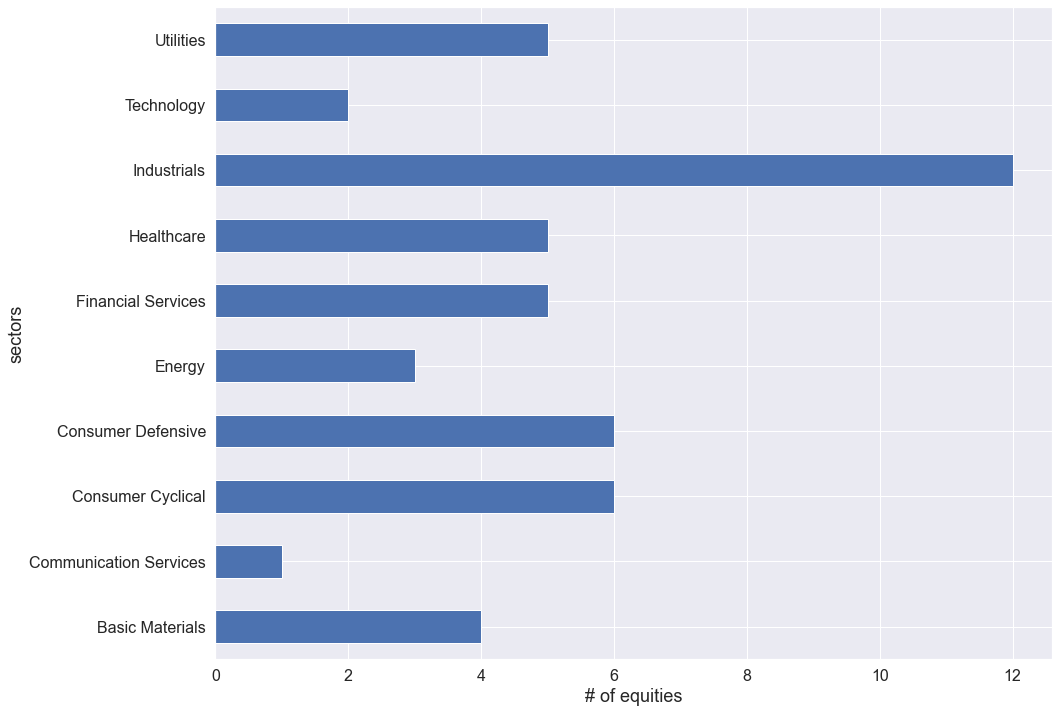

In [365]:
# sizing
plt.figure(figsize=(15, 12))

# charting
(df.groupby('sector')
   ['sector'].count().plot.barh())

# ascetics
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('sectors', fontsize=18)
plt.xlabel('# of equities', fontsize=18)

Simple Boxplot

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Industrials'),
  Text(1, 0, 'Financial Services'),
  Text(2, 0, 'Basic Materials'),
  Text(3, 0, 'Healthcare'),
  Text(4, 0, 'Energy'),
  Text(5, 0, 'Consumer Defensive'),
  Text(6, 0, 'Utilities'),
  Text(7, 0, 'Consumer Cyclical'),
  Text(8, 0, 'Communication Services'),
  Text(9, 0, 'Technology')])

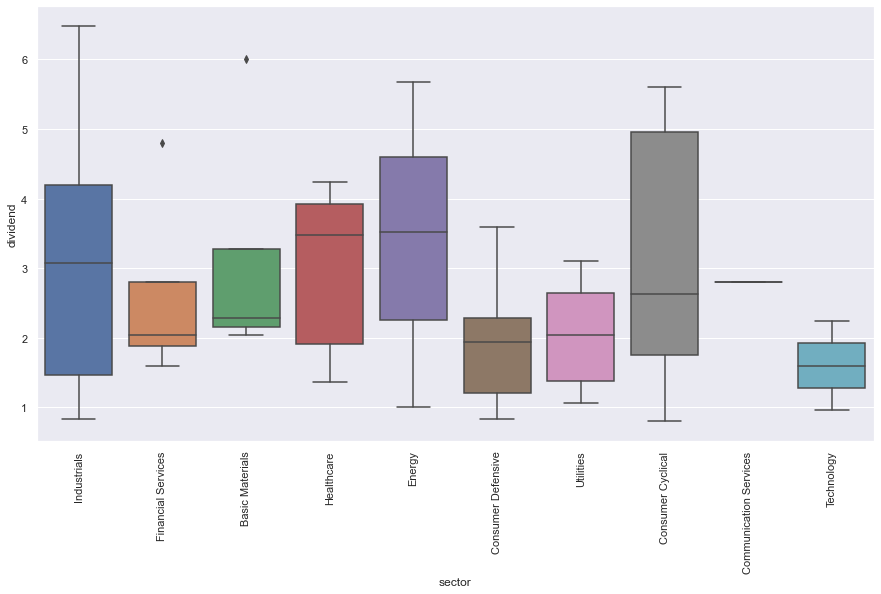

In [366]:
sns.set_theme(style="ticks", palette="pastel")
sns.set(rc = {'figure.figsize':(15,8)})

ax = sns.boxplot(x="sector", y="dividend",
            data=df)
# sns.despine(offset=10, trim=True)
plt.xticks(rotation=90)

**Rate of Return :: 2021**

2021 wasn't a year of Value but it may be interesting how an equally weighted portfolio of our identified equities faired out last year compared to the SPY.

Please note, this is purely capital gains on the equity price front, not including dividends paid.

In [372]:
# setting up a seperate dataframe for this exercise
df_l_yr = pd.DataFrame([])
df_l_yr = df.copy()

# dropping a few columns to lighten the visual load
df_l_yr = df_l_yr.drop(columns=['first_div','dividend'], axis=1)
df_l_yr.head(3)

,symbol,name,sector,industry
0,ADP,"Automatic Data Processing, Inc.",Industrials,Staffing & Employment Services
1,AFL,Aflac Incorporated,Financial Services,Insurance—Life
2,APD,"Air Products and Chemicals, Inc.",Basic Materials,Specialty Chemicals


Pulling in the 2021 percent change for the dataframe. **I will use `investpy` to accomplish this goal, however I do know there are 2 equities ( listed below ) which do not boad well with `investpy` & as such I will remove them & revert to `yfinance` for them:**

    * WTRG
    * RRX
    * J

In [373]:
prev = len(df_l_yr)
print(prev,'| The current length')

49 | The current length


In [374]:
# dropping the equities that throw errors
df_l_yr = df_l_yr[df_l_yr['symbol'] != 'WTRG']
df_l_yr = df_l_yr[df_l_yr['symbol'] != 'RRX']
df_l_yr = df_l_yr[df_l_yr['symbol'] != 'J']

# reseting the index
df_l_yr = df_l_yr.reset_index()
df_l_yr = df_l_yr.drop(columns=['index'])

In [375]:
post = len(df_l_yr)
print(post,'| The current length now, meaning',prev-post,'were removed')

46 | The current length now, meaning 3 were removed


Ready. I will add them back after.

In [376]:
# the main holdings
pct_change = []

# pulling in the tickers
for i in tqdm(range(0,len(df_l_yr))):   
    syb = yf.Ticker(df_l_yr['symbol'][i])
    syb_s = df_l_yr['symbol'][i]
    syb_st = str(syb_s)

    # starting a new date range
    l_yr = pd.DataFrame([])
    l_yr = investpy.stocks.get_stock_historical_data(stock=syb_st, country='United States', 
                                         from_date='01/01/1990', to_date='31/12/2021',
                                         as_json=False, order='descending', interval='Daily')
    # sleeping 
    sleep(5)
        
    # formulating the start date for the index
    s = 0
    s = len(l_yr) - 1
    
    # the pct_change
    pct = round(((l_yr['Close'][0] / l_yr['Close'][s])-1)*100,2)
    pct_change.append(pct)
    

100%|██████████| 46/46 [05:49<00:00,  7.59s/it]


In [377]:
df_l_yr['pct_ch_1990'] = pct_change

Ok. I am down two (2) which didn't run through `investpy` so I will deviate to `yfinance` to see if it's working properly.

In [381]:
# start with the first one
yf1_sy = yf.Ticker("WTRG")
WTRG = yf1_sy.history(period="max")
WTRG = WTRG[::-1]
WTRG = WTRG.reset_index()

# removing rows with a year before 1990
WTRG['year'] = pd.DatetimeIndex(WTRG['Date']).year
WTRG = WTRG[WTRG['year'] >= 1990]
WTRG = WTRG.drop(columns=['year','Stock Splits','Open','High','Low','Volume'])
WTRG = WTRG.set_index('Date')

In [382]:
# now the next one
yf2_sy = yf.Ticker("RRX")
RRX = yf2_sy.history(period="max")
RRX = RRX[::-1]
RRX = RRX.reset_index()

# removing rows with a year before 1990
RRX['year'] = pd.DatetimeIndex(RRX['Date']).year
RRX = RRX[RRX['year'] >= 1990]
RRX = RRX.drop(columns=['year','Stock Splits','Open','High','Low','Volume'])
RRX = RRX.set_index('Date')

In [384]:
# now the last 
yf3_sy = yf.Ticker("J")
jac = yf3_sy.history(period="max")
jac = jac[::-1]
jac = jac.reset_index()

# removing rows with a year before 1990
jac['year'] = pd.DatetimeIndex(jac['Date']).year
jac = jac[jac['year'] >= 1990]
jac = jac.drop(columns=['year','Stock Splits','Open','High','Low','Volume'])
jac = jac.set_index('Date')

In [386]:
jac.tail(1)

,Close,Dividends
Date,,
1990-01-02,1.697827,0.0


As see above, yfinance says that **WTRG** was trading at 0.719 on 2 January 1990. This is incorrect, hence why I gravitated to `investpy` to handle this portion. `investpy` can't handle **WTRG** or **RRX**, thus I will have to manually input the data. To remain transparent, I will include the data below for your own reference.

sd = 2 January 1990 ( the start date )
ed = 31 December 1990 ( the end date )

**WTRG**

    * WTRG_sd_price = 2.15
    * WTRG_ed_price = 53.69

**RRX**

    * RRX_sd_price = 8.25
    * RRX_ed_price = 170.18

**J**

    * jac_sd_price = 1.69
    * jac_ed_price = 127.66

The next two (2) lines of code are setting up the addition of these to the main dataframe.

In [387]:
# the WTRG data
wtrg_pct = round(((53.69 / 2.15)-1)*100,2)

# setting up a WTRG dataframe to append
WTRG_df = pd.DataFrame([])
WTRG_df = pd.DataFrame([yf1_sy.info['symbol'],yf1_sy.info['longName'],yf1_sy.info['sector'],yf1_sy.info['industry'],
                    wtrg_pct]).T
WTRG_df.columns = ['symbol', 'name', 'sector', 'industry', 'pct_ch_1990']

# the RRX data
RRX_pct = round(((170.18 / 8.25)-1)*100,2)

# setting up a RRX dataframe to append
RRX_df = pd.DataFrame([])
RRX_df = pd.DataFrame([yf2_sy.info['symbol'],yf2_sy.info['longName'],yf2_sy.info['sector'],yf2_sy.info['industry'],
                    RRX_pct]).T
RRX_df.columns = ['symbol', 'name', 'sector', 'industry', 'pct_ch_1990']

# the jac data
jac_pct = round(((127.66 / 1.69)-1)*100,2)

# setting up a RRX dataframe to append
jac_df = pd.DataFrame([])
jac_df = pd.DataFrame([yf3_sy.info['symbol'],yf3_sy.info['longName'],yf3_sy.info['sector'],yf3_sy.info['industry'],
                    jac_pct]).T
jac_df.columns = ['symbol', 'name', 'sector', 'industry', 'pct_ch_1990']


In [390]:
# WTRG :: adding to the main dataframe
df_l_yr = df_l_yr.append(WTRG_df)
df_l_yr = df_l_yr.reset_index()
df_l_yr = df_l_yr.drop(columns=['index'])

# RRX :: adding to the main dataframe
df_l_yr = df_l_yr.append(RRX_df)
df_l_yr = df_l_yr.reset_index()
df_l_yr = df_l_yr.drop(columns=['index'])

# jac :: adding to the main dataframe
df_l_yr = df_l_yr.append(jac_df)
df_l_yr = df_l_yr.reset_index()
df_l_yr = df_l_yr.drop(columns=['index'])


In [391]:
df_l_yr.tail(3)

,symbol,name,sector,industry,pct_ch_1990
46,WTRG,"Essential Utilities, Inc.",Utilities,Utilities—Regulated Water,2397.21
47,RRX,Regal Rexnord Corporation,Industrials,Specialty Industrial Machinery,1962.79
48,J,Jacobs Engineering Group Inc.,Industrials,Engineering & Construction,7453.85


I now have them all there with "a bit of manual love" to proceed.

**Let's move on over to a comparable to what we can compare to the average of the above :: the `SPY` with a Wikipedia definition below:**

    * The SPDR S&P 500 trust is an exchange-traded fund which trades on the NYSE Arca under the symbol (NYSE Arca: SPY). SPDR is an acronym for the Standard & Poor's Depositary Receipts, the former name of the ETF. It is designed to track the S&P 500 stock market index. This fund is the largest ETF in the world.
    
I'll turn back to `investpy` but the SPY is not a stock, per say, it's an ETF so the `investpy` pull is "a little different" for your reference.

In [392]:
spy_df = investpy.get_etf_historical_data(etf='SPDR S&P 500', country='United States',
                                        from_date='01/01/1990', to_date='31/12/2021')
spy_df = spy_df[::-1]
spy_df = spy_df.drop(columns=['Open','High','Low','Volume','Currency','Exchange'])

What is seen here is that the `SPY` has only been reporting since 1993; it was actually reporting the day before but I will turn a blind eye to that.

**I will need to adjust the previous dataframe to use that date (1993-02-01) as the point of referance for all** but first I'll first run the numbers here.

In [393]:
spy_s = spy_df['Close'][int(len(spy_df)-1)]
print("${}".format(spy_s),'| This is the price to compare to all going forwards as that\'s where the SPY started')

$44.25 | This is the price to compare to all going forwards as that's where the SPY started


In [394]:
# this will be the main depository
pct_spy = []

# re-establishing the first observation to compare too here it has been reversed ( same # as before )
spy_c_s = spy_df['Close'][int(len(spy_df)-1)]

for i in tqdm(range(0,len(spy_df)-1)):
    
    spy_pct = 0
    spy_pct = (( spy_df['Close'][i] / spy_c_s )-1)*100

    pct_spy.append(spy_pct)

pct_spy.append(0)

100%|██████████| 7288/7288 [00:00<00:00, 168635.70it/s]


In [395]:
# add to the dataframe
spy_df['spy_pct'] = pct_spy

In [396]:
spy_df.head(1)

,Close,spy_pct
Date,,
2021-12-31,474.96,973.355932


In [397]:
spy_df.tail(1)

,Close,spy_pct
Date,,
1993-02-01,44.25,0.0


In [398]:
spy_df = spy_df.drop(columns=['Close'])

In [399]:
spy_df.head(1)

,spy_pct
Date,
2021-12-31,973.355932


Voila; worked!

Now, I will go through the exact same process albeit with the iShares Russell 1000 Value Index (NYSE Arca IWD).

In [400]:
r_v_df = investpy.get_etf_historical_data(etf='iShares Russell 1000 Value', country='United States',
                                        from_date='01/01/1990', to_date='31/12/2021')
r_v_df = r_v_df[::-1]
r_v_df = r_v_df.drop(columns=['Open','High','Low','Volume','Currency','Exchange'])
r_v_df.tail(3)

,Close
Date,
2000-06-01,56.96
2000-05-31,56.44
2000-05-30,56.04


This is even shorter but "it is what it is"

In [401]:
rus_s = r_v_df['Close'][int(len(r_v_df)-1)]
print("${}".format(rus_s),'| This is the price to compare to all going forwards as that\'s where the IWD started')

$56.04 | This is the price to compare to all going forwards as that's where the IWD started


In [402]:
# this will be the main depository
pct_rus = []

# re-establishing the first observation to compare too here it has been reversed ( same # as before )
rus_c_s = r_v_df['Close'][int(len(r_v_df)-1)]

for i in tqdm(range(0,len(r_v_df)-1)):
    
    rus_pct = 0
    rus_pct = (( r_v_df['Close'][i] / rus_c_s )-1)*100

    pct_rus.append(rus_pct)

pct_rus.append(0)

100%|██████████| 5463/5463 [00:00<00:00, 159783.85it/s]


In [403]:
# add to the dataframe
r_v_df['rus_pct'] = pct_rus
r_v_df.head(3)

,Close,rus_pct
Date,,
2021-12-31,167.93,199.660956
2021-12-30,167.97,199.732334
2021-12-29,168.08,199.928622


In [404]:
r_v_df.tail(3)

,Close,rus_pct
Date,,
2000-06-01,56.96,1.641685
2000-05-31,56.44,0.713776
2000-05-30,56.04,0.000000


**Summary of Comps | `SPY` & `IWD`**

I **now have two (2) indexes to compare the identified equities** which haven't decreased their dividend during our defined time range. 

The important thing to bear in mind, however, **they don't have the same time horizon as the equities**; the index time horizons below ::

    * SPY | 1993-02-01
    * IWD | 2000-05-30
    
In short, this means there needs to be two (2) dataframes for the equities.

**Equities vs. SPY** | This will be setup first. Please note, `investpy` will be used in this section.

In [405]:
df_l_yr.head(2)

,symbol,name,sector,industry,pct_ch_1990
0,ADP,"Automatic Data Processing, Inc.",Industrials,Staffing & Employment Services,4922.0
1,AFL,Aflac Incorporated,Financial Services,Insurance—Life,4890.6


In [406]:
df_l_yr.sector.unique()

array(['Industrials', 'Financial Services', 'Basic Materials',
       'Healthcare', 'Energy', 'Consumer Defensive', 'Utilities',
       'Consumer Cyclical', 'Communication Services', 'Technology'],
      dtype=object)

In [407]:
tick_df = investpy.stocks.get_stock_historical_data(stock=df_l_yr.symbol[0], country='United States',
                                          from_date='01/02/1993', to_date='31/12/2021',
                                          as_json=False, order='descending', interval='Daily')
tick_df = tick_df.drop(columns=['Open','High','Low','Volume','Currency'])
   
tick_df.tail(2)

,Close
Date,
1993-02-02,10.42
1993-02-01,10.34


In [408]:
# setting up the comparison number
tick_df_st = tick_df.Close[len(tick_df)-1]

tick_pct = []

for i in range(0,len(tick_df)-1):
    t_pct = 0
    t_pct = ((tick_df['Close'][i] / tick_df_st)-1)*100
    tick_pct.append(t_pct)
tick_pct.append(0)

# this is the symbol to add to the dataframe column alongside "pct"
tick_df_s = df_l_yr.symbol[0]
tick_df[tick_df_s+'_pct'] = tick_pct


In [409]:
tick_df.head(2)

,Close,ADP_pct
Date,,
2021-12-31,246.58,2284.719536
2021-12-30,245.56,2274.854932


In [410]:
tick_df.tail(2)

,Close,ADP_pct
Date,,
1993-02-02,10.42,0.773694
1993-02-01,10.34,0.000000


Before I proceed, I will remember the "two equities" that through errors; "if you remember"? 

    * WTRG
    * RRX

I believe they are at the end, I'll check.

In [411]:
df_l_yr.tail(3)

,symbol,name,sector,industry,pct_ch_1990
46,WTRG,"Essential Utilities, Inc.",Utilities,Utilities—Regulated Water,2397.21
47,RRX,Regal Rexnord Corporation,Industrials,Specialty Industrial Machinery,1962.79
48,J,Jacobs Engineering Group Inc.,Industrials,Engineering & Construction,7453.85


Lovely, I'll drop them & add them back in w/ `yfinance` later.

In [413]:
df_l_yr_t = pd.DataFrame([])
df_l_yr_t = df_l_yr.copy()
df_l_yr_t = df_l_yr_t.iloc[:-2]

In [416]:
# dropping the equities that throw errors
df_l_yr_t = df_l_yr_t[df_l_yr_t['symbol'] != 'WTRG']
df_l_yr_t = df_l_yr_t[df_l_yr_t['symbol'] != 'RRX']
df_l_yr_t = df_l_yr_t[df_l_yr_t['symbol'] != 'J']

# reseting the index
df_l_yr_t = df_l_yr_t.reset_index()
df_l_yr_t = df_l_yr_t.drop(columns=['index'])

In [418]:
# checking if the two were removed
df_l_yr_t.tail(3)

,symbol,name,sector,industry,pct_ch_1990
43,LEG,"Leggett & Platt, Incorporated",Consumer Cyclical,"Furnishings, Fixtures & Appliances",1003.49
44,AVT,"Avnet, Inc.",Technology,Electronics & Computer Distribution,159.63
45,BOH,Bank of Hawaii Corporation,Financial Services,Banks—Regional,657.32


In [420]:
# this is the main dataframe for the equities structured against the SPY
eq_spy = pd.DataFrame([])

for j in tqdm(range(0,len(df_l_yr_t))):
    # getting the data from investpy but I will always start with a clean one
    tick_df = pd.DataFrame([])
    tick_df = investpy.stocks.get_stock_historical_data(stock=df_l_yr_t.symbol[j], country='United States',
                                              from_date='01/02/1993', to_date='31/12/2021',
                                              as_json=False, order='descending', interval='Daily')
    tick_df = tick_df.drop(columns=['Open','High','Low','Volume','Currency'])

    # setting up the comparison number
    tick_df_st = tick_df.Close[len(tick_df)-1]

    tick_pct = []

    for i in range(0,len(tick_df)-1):
        t_pct = 0
        t_pct = ((tick_df['Close'][i] / tick_df_st)-1)*100
        tick_pct.append(t_pct)
    tick_pct.append(0)

    # this is the symbol to add to the dataframe column alongside "pct"
    tick_df_s = df_l_yr_t.symbol[j]
    tick_df[tick_df_s+'_pct'] = tick_pct
    tick_df = tick_df.drop(columns='Close')

    # putting the data into the main dataframe
    eq_spy[tick_df_s+'_pct'] = tick_df[tick_df_s+'_pct']

100%|██████████| 46/46 [05:04<00:00,  6.61s/it]


Let's take a "sideways" look to confirm it worked.

In [421]:
eq_spy_T = eq_spy.T
eq_spy_T.head(1)

Date,2021-12-31,2021-12-30,2021-12-29,2021-12-28,2021-12-27,2021-12-23,2021-12-22,2021-12-21,2021-12-20,2021-12-17,...,1993-02-12,1993-02-11,1993-02-10,1993-02-09,1993-02-08,1993-02-05,1993-02-04,1993-02-03,1993-02-02,1993-02-01
ADP_pct,2284.719536,2274.854932,2298.549323,2279.787234,2281.914894,2240.425532,2198.065764,2143.230174,2118.181818,2118.665377,...,4.83559,5.222437,5.222437,5.029014,5.996132,5.705996,4.83559,3.578337,0.773694,0.0


In [422]:
eq_spy_T.tail(1)

Date,2021-12-31,2021-12-30,2021-12-29,2021-12-28,2021-12-27,2021-12-23,2021-12-22,2021-12-21,2021-12-20,2021-12-17,...,1993-02-12,1993-02-11,1993-02-10,1993-02-09,1993-02-08,1993-02-05,1993-02-04,1993-02-03,1993-02-02,1993-02-01
BOH_pct,429.12192,429.879975,432.722678,431.775111,431.332912,426.531901,422.23626,419.077701,406.317119,410.360076,...,4.73784,5.559065,6.317119,5.81175,5.30638,5.053696,3.7271,2.65319,-0.50537,0.0


Looks like it worked. Let's check for nulls.

In [423]:
eq_spy_n = pd.DataFrame(eq_spy.isna().sum())
eq_spy_n.columns = ['is_na']

In [424]:
eq_spy_n[eq_spy_n['is_na']>0].count()

is_na    43
dtype: int64

In [425]:
eq_spy_n[eq_spy_n['is_na']>0].max()

is_na    1348
dtype: int64

In [426]:
eq_spy_n[eq_spy_n['is_na']>0].max() / len(eq_spy)

is_na    0.185038
dtype: float64

Appears that there are 8 equities that had a null value, the maximum number of nulls in a single equity was 137 representing a little shy of 2% (1.89%) of the dataframe. 

I will apply a forward fill.

In [427]:
eq_spy = eq_spy.fillna(method='ffill')

In [428]:
eq_spy_null = pd.DataFrame(eq_spy.isna().sum())
eq_spy_null.columns = ['is_na']

In [429]:
eq_spy_null[eq_spy_null['is_na']>0].count()

is_na    0
dtype: int64

Voila; now too add the below back in with `yfinance`.

    * WTRG
    * RRX
    * J

WTRG will go first.

In [430]:
# setting up the dataframe
WTRG_str = 'WTRG'
WTRG_e_spy_t = yf.Ticker(WTRG_str)
WTRG_e_spy_yf = WTRG_e_spy_t.history(start="1993-02-01", end="2021-12-31", interval="1D")

# cleaning it
WTRG_e_spy_yf = WTRG_e_spy_yf.drop(columns=['Open','High','Low','Volume','Dividends','Stock Splits'])
WTRG_e_spy_yf = WTRG_e_spy_yf[::-1]

# the first observation to be used as a comparison
WTRG_e_t_st = WTRG_e_spy_yf.Close[len(WTRG_e_spy_yf)-1]

In [431]:
# this is the loop to pull the data to be added in
tick_pct = []

for i in tqdm(range(0,len(WTRG_e_spy_yf)-1)):
    t_pct = 0
    t_pct = ((WTRG_e_spy_yf['Close'][i] / WTRG_e_t_st)-1)*100
    tick_pct.append(t_pct)
tick_pct.append(0)

100%|██████████| 7279/7279 [00:00<00:00, 152072.30it/s]


In [432]:
# bringing it in
WTRG_e_spy_yf[WTRG_str+'_pct'] = tick_pct

# dropping Close
WTRG_e_spy_yf = WTRG_e_spy_yf.drop(columns=['Close'])
WTRG_e_spy_yf.tail(2)

,WTRG_pct
Date,
1993-02-02,-0.775147
1993-02-01,0.000000


RRX next.

In [433]:
# setting up the dataframe
RRX_str = 'RRX'
RRX_e_spy_t = yf.Ticker(RRX_str)
RRX_e_spy_yf = RRX_e_spy_t.history(start="1993-02-01", end="2021-12-31", interval="1D")

# cleaning it
RRX_e_spy_yf = RRX_e_spy_yf.drop(columns=['Open','High','Low','Volume','Dividends','Stock Splits'])
RRX_e_spy_yf = RRX_e_spy_yf[::-1]

# the first observation to be used as a comparison
RRX_e_t_st = RRX_e_spy_yf.Close[len(RRX_e_spy_yf)-1]

In [434]:
# this is the loop to pull the data to be added in
tick_pct = []

for i in tqdm(range(0,len(RRX_e_spy_yf)-1)):
    t_pct = 0
    t_pct = ((RRX_e_spy_yf['Close'][i] / RRX_e_t_st)-1)*100
    tick_pct.append(t_pct)
tick_pct.append(0)

100%|██████████| 7278/7278 [00:00<00:00, 164427.58it/s]


In [435]:
# bringing it in
RRX_e_spy_yf[RRX_str+'_pct'] = tick_pct

# dropping Close
RRX_e_spy_yf = RRX_e_spy_yf.drop(columns=['Close'])
RRX_e_spy_yf.tail(2)

,RRX_pct
Date,
1993-02-02,1.249999
1993-02-01,0.000000


J for the final run.

In [441]:
# setting up the dataframe
jac_str = 'J'
jac_e_spy_t = yf.Ticker(jac_str)
jac_e_spy_yf = jac_e_spy_t.history(start="1993-02-01", end="2021-12-31", interval="1D")

# cleaning it
jac_e_spy_yf = jac_e_spy_yf.drop(columns=['Open','High','Low','Volume','Dividends','Stock Splits'])
jac_e_spy_yf = jac_e_spy_yf[::-1]

# the first observation to be used as a comparison
jac_e_t_st = jac_e_spy_yf.Close[len(jac_e_spy_yf)-1]

In [442]:
# this is the loop to pull the data to be added in
tick_pct = []

for i in tqdm(range(0,len(jac_e_spy_yf)-1)):
    t_pct = 0
    t_pct = ((jac_e_spy_yf['Close'][i] / jac_e_t_st)-1)*100
    tick_pct.append(t_pct)
tick_pct.append(0)

100%|██████████| 7280/7280 [00:00<00:00, 163426.98it/s]


In [443]:
# bringing it in
jac_e_spy_yf[jac_str+'_pct'] = tick_pct

# dropping Close
jac_e_spy_yf = jac_e_spy_yf.drop(columns=['Close'])
jac_e_spy_yf.tail(3)

,J_pct
Date,
1993-02-03,0.925906
1993-02-02,0.000000
1993-02-01,0.000000


Well that was a bit easier. There is now the following dataframes to be brought in:

    * WTRG_e_spy_yf
    * RRX_e_spy_yf
    * jac_e_spy_yf
    
Before they are brought in, a measure will be established to compare too; i.e. the length of the main dataframe before adding.

In [445]:
eq_spy['WTRG_pct'] = WTRG_e_spy_yf['WTRG_pct']
eq_spy['RRX_pct'] = RRX_e_spy_yf['RRX_pct']
eq_spy['J_pct'] = jac_e_spy_yf['J_pct']

In [447]:
print('',eq_spy['WTRG_pct'].isna().sum(),'| WTRG null\'s','\n',
eq_spy['RRX_pct'].isna().sum(),'| RRX null\'s','\n',
     eq_spy['J_pct'].isna().sum(),'| J null\'s')

 5 | WTRG null's 
 6 | RRX null's 
 4 | J null's


In this round, a forward fill will be used as it was in the others.

In [448]:
eq_spy['WTRG_pct'] = eq_spy['WTRG_pct'].fillna(method='ffill')
eq_spy['RRX_pct'] = eq_spy['RRX_pct'].fillna(method='ffill')
eq_spy['J_pct'] = eq_spy['J_pct'].fillna(method='ffill')

In [450]:
print('',eq_spy['WTRG_pct'].isna().sum(),'| WTRG null\'s','\n',
eq_spy['RRX_pct'].isna().sum(),'| RRX null\'s','\n',
     eq_spy['J_pct'].isna().sum(),'| J null\'s')

 1 | WTRG null's 
 1 | RRX null's 
 1 | J null's


Let's see where those are; I believe I know

In [451]:
eq_spy['WTRG_pct'].head(1)

Date
2021-12-31   NaN
Name: WTRG_pct, dtype: float64

In [452]:
eq_spy['RRX_pct'].head(1)

Date
2021-12-31   NaN
Name: RRX_pct, dtype: float64

In [453]:
eq_spy['J_pct'].head(1)

Date
2021-12-31   NaN
Name: J_pct, dtype: float64

Correct. That's why these two threw errors; let's revert to backwards fill.

In [454]:
eq_spy['WTRG_pct'] = eq_spy['WTRG_pct'].fillna(method='bfill')
eq_spy['RRX_pct'] = eq_spy['RRX_pct'].fillna(method='bfill')
eq_spy['J_pct'] = eq_spy['J_pct'].fillna(method='bfill')

In [455]:
print('',eq_spy['WTRG_pct'].isna().sum(),'| WTRG null\'s','\n',
eq_spy['RRX_pct'].isna().sum(),'| RRX null\'s','\n',
     eq_spy['J_pct'].isna().sum(),'| J null\'s')

 0 | WTRG null's 
 0 | RRX null's 
 0 | J null's


Alright, there is now a complete dataframe. An equally weighted average for all will be used to compare.

It needs a unique & short name, similar to `SPY` & `IWD`. I will call it `VASP` standing for:

    * VASP | Value Average for the S&P

Because why not.

In [456]:
vasp = pd.DataFrame([])
vasp = eq_spy.copy()

In [457]:
vasp['vasp_avg'] = vasp.mean(axis=1)
vasp['vasp_avg'].head(3)

Date
2021-12-31    1901.882984
2021-12-30    1897.093097
2021-12-29    1904.483891
Name: vasp_avg, dtype: float64

In [458]:
print(vasp['vasp_avg'].isna().sum(),'| Checking for nulls')

0 | Checking for nulls


Now making that column the only column for the `vasp` dataframe.

In [459]:
vasp = pd.DataFrame(vasp['vasp_avg'])

In [460]:
vasp.head(3)

,vasp_avg
Date,
2021-12-31,1901.882984
2021-12-30,1897.093097
2021-12-29,1904.483891


Adding in the `S&P` data

In [461]:
vasp['spy_pct'] = spy_df['spy_pct']
vasp.head(2)

,vasp_avg,spy_pct
Date,,
2021-12-31,1901.882984,973.355932
2021-12-30,1897.093097,976.067797


In [462]:
vasp.tail(2)

,vasp_avg,spy_pct
Date,,
1993-02-02,0.714355,0.20339
1993-02-01,0.000000,0.00000


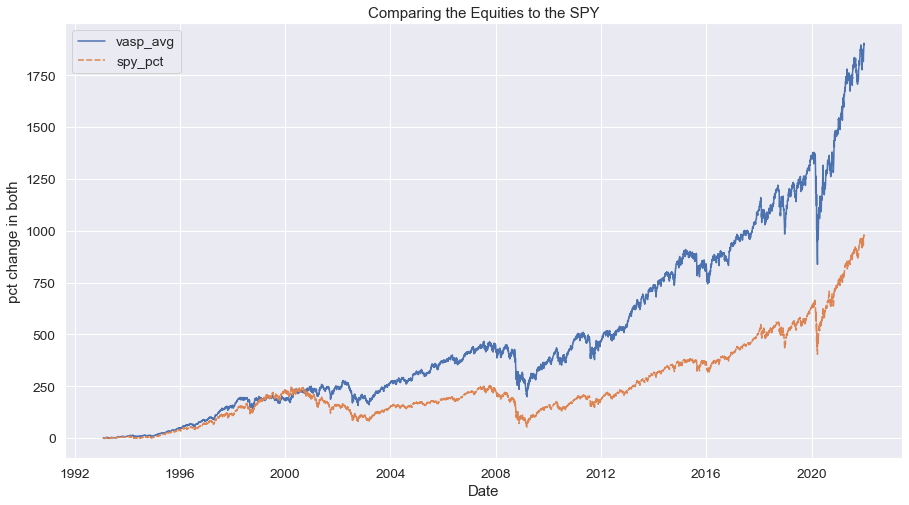

In [463]:
sns.set(font_scale = 1.25)
vasp_c = sns.lineplot(data=vasp).set(title='Comparing the Equities to the SPY',
                                     xlabel='Date',ylabel='pct change in both')

In [464]:
print('It appears that the selected equities performed better; meaning',
     "{}%".format(round(((vasp['vasp_avg'][0] / vasp['spy_pct'][0])-1)*100,2)),'better')

It appears that the selected equities performed better; meaning 95.39% better


Well then. Not too bad.

**Equities vs. IWD** | This will now be setup. As a reminder, the `IWD` dataframe started 2000-05-30.

In [466]:
# double checking the last 2 are the "problem equities"
df_l_yr.tail(3)

,symbol,name,sector,industry,pct_ch_1990
46,WTRG,"Essential Utilities, Inc.",Utilities,Utilities—Regulated Water,2397.21
47,RRX,Regal Rexnord Corporation,Industrials,Specialty Industrial Machinery,1962.79
48,J,Jacobs Engineering Group Inc.,Industrials,Engineering & Construction,7453.85


In [467]:
# Yup! Setting up a new dataframe w/out the ones that cause issues
df_l_yr = df_l_yr[df_l_yr['symbol'] != 'WTRG']
df_l_yr = df_l_yr[df_l_yr['symbol'] != 'RRX']
df_l_yr = df_l_yr[df_l_yr['symbol'] != 'J']

In [468]:
df_l_yr_t.tail(3)

,symbol,name,sector,industry,pct_ch_1990
43,LEG,"Leggett & Platt, Incorporated",Consumer Cyclical,"Furnishings, Fixtures & Appliances",1003.49
44,AVT,"Avnet, Inc.",Technology,Electronics & Computer Distribution,159.63
45,BOH,Bank of Hawaii Corporation,Financial Services,Banks—Regional,657.32


In [469]:
# this is the main dataframe for the equities structured against the iShares Russell Value ETF (IWD)
eq_rus = pd.DataFrame([])

for j in tqdm(range(0,len(df_l_yr_t))):
    # getting the data from investpy but I will always start with a clean one
    tick_df = pd.DataFrame([])
    tick_df = investpy.stocks.get_stock_historical_data(stock=df_l_yr_t.symbol[j], country='United States',
                                              from_date='30/05/2000', to_date='31/12/2021',
                                              as_json=False, order='descending', interval='Daily')
    tick_df = tick_df.drop(columns=['Open','High','Low','Volume','Currency'])

    # setting up the comparison number
    tick_df_st = tick_df.Close[len(tick_df)-1]

    tick_pct = []

    for i in range(0,len(tick_df)-1):
        t_pct = 0
        t_pct = ((tick_df['Close'][i] / tick_df_st)-1)*100
        tick_pct.append(t_pct)
    tick_pct.append(0)

    # this is the symbol to add to the dataframe column alongside "pct"
    tick_df_s = df_l_yr_t.symbol[j]
    tick_df[tick_df_s+'_pct'] = tick_pct
    tick_df = tick_df.drop(columns='Close')

    # putting the data into the main dataframe
    eq_rus[tick_df_s+'_pct'] = tick_df[tick_df_s+'_pct']

100%|██████████| 46/46 [04:12<00:00,  5.49s/it]


In [470]:
eq_rus_T = eq_rus.T
eq_rus_T.head(1)

Date,2021-12-31,2021-12-30,2021-12-29,2021-12-28,2021-12-27,2021-12-23,2021-12-22,2021-12-21,2021-12-20,2021-12-17,...,2000-06-12,2000-06-09,2000-06-08,2000-06-07,2000-06-06,2000-06-05,2000-06-02,2000-06-01,2000-05-31,2000-05-30
ADP_pct,461.302071,458.980196,464.55725,460.141134,460.64193,450.876394,440.905987,427.999089,422.103346,422.217164,...,-1.069884,0.796722,0.0,2.913726,3.482814,2.458457,2.253585,-1.115411,-1.343046,0.0


In [471]:
eq_rus_T.tail(1)

Date,2021-12-31,2021-12-30,2021-12-29,2021-12-28,2021-12-27,2021-12-23,2021-12-22,2021-12-21,2021-12-20,2021-12-17,...,2000-06-12,2000-06-09,2000-06-08,2000-06-07,2000-06-06,2000-06-05,2000-06-02,2000-06-01,2000-05-31,2000-05-30
BOH_pct,286.168741,286.721992,288.79668,288.105118,287.782388,284.278469,281.143384,278.838174,269.525127,272.475795,...,-2.028585,-2.627939,-1.751959,1.42923,0.0,1.705855,5.763024,4.887045,3.73444,0.0


Looks like it worked. Let's check for nulls.

In [472]:
eq_rus_n = pd.DataFrame(eq_rus.isna().sum())
eq_rus_n.columns = ['is_na']

In [473]:
eq_rus_n[eq_rus_n['is_na']>0].count()

is_na    42
dtype: int64

In [474]:
eq_rus_n[eq_rus_n['is_na']>0].max()

is_na    5
dtype: int64

In [475]:
eq_rus_n[eq_rus_n['is_na']>0].max() / len(eq_rus)

is_na    0.00092
dtype: float64

Appears that there are 8 equities that had a null value, the maximum number of nulls in a single equity was 137 representing a little shy of 1% of the dataframe. 

I will apply a forward fill.

In [476]:
eq_rus = eq_rus.fillna(method='ffill')

In [477]:
eq_rus_null = pd.DataFrame(eq_rus.isna().sum())
eq_rus_null.columns = ['is_na']

In [478]:
eq_rus_null[eq_rus_null['is_na']>0].count()

is_na    0
dtype: int64

Voila; now too add the below back in with `yfinance`.

    * WTRG
    * RRX
    * J

WTRG will go first.

In [479]:
# setting up the dataframe
WTRG_r_str = 'WTRG'
WTRG_e_rus_t = yf.Ticker(WTRG_r_str)
WTRG_e_rus_yf = WTRG_e_rus_t.history(start="2000-05-30", end="2021-12-31", interval="1D")

# cleaning it
WTRG_e_rus_yf = WTRG_e_rus_yf.drop(columns=['Open','High','Low','Volume','Dividends','Stock Splits'])
WTRG_e_rus_yf = WTRG_e_rus_yf[::-1]

# the first observation to be used as a comparison
WTRG_e_t_st = WTRG_e_rus_yf.Close[len(WTRG_e_rus_yf)-1]

In [480]:
# this is the loop to pull the data to be added in
tick_pct = []

for i in tqdm(range(0,len(WTRG_e_rus_yf)-1)):
    t_pct = 0
    t_pct = ((WTRG_e_rus_yf['Close'][i] / WTRG_e_t_st)-1)*100
    tick_pct.append(t_pct)
tick_pct.append(0)

100%|██████████| 5432/5432 [00:00<00:00, 170488.94it/s]


In [481]:
# bringing it in
WTRG_e_rus_yf[WTRG_r_str+'_pct'] = tick_pct

# dropping Close
WTRG_e_rus_yf = WTRG_e_rus_yf.drop(columns=['Close'])
WTRG_e_rus_yf.tail(2)

,WTRG_pct
Date,
2000-05-31,2.590633
2000-05-30,0.000000


RRX next.

In [482]:
# setting up the dataframe
RRX_str = 'RRX'
RRX_e_rus_t = yf.Ticker(RRX_str)
RRX_e_rus_yf = RRX_e_rus_t.history(start="2000-05-30", end="2021-12-31", interval="1D")

# cleaning it
RRX_e_rus_yf = RRX_e_rus_yf.drop(columns=['Open','High','Low','Volume','Dividends','Stock Splits'])
RRX_e_rus_yf = RRX_e_rus_yf[::-1]

# the first observation to be used as a comparison
RRX_e_t_st = RRX_e_rus_yf.Close[len(RRX_e_rus_yf)-1]

In [483]:
# this is the loop to pull the data to be added in
tick_pct = []

for i in tqdm(range(0,len(RRX_e_rus_yf)-1)):
    t_pct = 0
    t_pct = ((RRX_e_rus_yf['Close'][i] / RRX_e_t_st)-1)*100
    tick_pct.append(t_pct)

tick_pct.append(0)

100%|██████████| 5432/5432 [00:00<00:00, 175603.18it/s]


In [484]:
# bringing it in
RRX_e_rus_yf[RRX_str+'_pct'] = tick_pct

# dropping Close
RRX_e_rus_yf = RRX_e_rus_yf.drop(columns=['Close'])
RRX_e_rus_yf.tail(2)

,RRX_pct
Date,
2000-05-31,-2.18976
2000-05-30,0.00000


J next

In [485]:
# setting up the dataframe
j_str = 'J'
j_e_rus_t = yf.Ticker(j_str)
j_e_rus_yf = j_e_rus_t.history(start="2000-05-30", end="2021-12-31", interval="1D")

# cleaning it
j_e_rus_yf = j_e_rus_yf.drop(columns=['Open','High','Low','Volume','Dividends','Stock Splits'])
j_e_rus_yf = j_e_rus_yf[::-1]

# the first observation to be used as a comparison
j_e_t_st = j_e_rus_yf.Close[len(j_e_rus_yf)-1]

In [486]:
# this is the loop to pull the data to be added in
tick_pct = []

for i in tqdm(range(0,len(j_e_rus_yf)-1)):
    t_pct = 0
    t_pct = ((j_e_rus_yf['Close'][i] / j_e_t_st)-1)*100
    tick_pct.append(t_pct)

tick_pct.append(0)

100%|██████████| 5432/5432 [00:00<00:00, 164966.04it/s]


In [487]:
# bringing it in
j_e_rus_yf[j_str+'_pct'] = tick_pct

# dropping Close
j_e_rus_yf = j_e_rus_yf.drop(columns=['Close'])
j_e_rus_yf.tail(2)

,J_pct
Date,
2000-05-31,-2.205881
2000-05-30,0.000000


Well that was a bit easier. There is now the following dataframes to be brought in:

    * WTRG_e_rus_yf
    * RRX_e_rus_yf
    * j_RRX_e_rus_yf
    
Before they are brought in, a measure will be established to compare too; i.e. the length of the main dataframe before adding.

In [488]:
eq_rus['WTRG_pct'] = WTRG_e_rus_yf['WTRG_pct']
eq_rus['RRX_pct'] = RRX_e_rus_yf['RRX_pct']
eq_rus['J_pct'] = j_e_rus_yf['J_pct']

In [489]:
print('',eq_rus['WTRG_pct'].isna().sum(),'| WTRG null\'s','\n',
eq_rus['RRX_pct'].isna().sum(),'| RRX null\'s','\n',
     eq_rus['J_pct'].isna().sum(),'| J null\'s')

 2 | WTRG null's 
 2 | RRX null's 
 2 | J null's


In this round, a forward fill will be used as it was in the others.

In [490]:
eq_rus['WTRG_pct'] = eq_rus['WTRG_pct'].fillna(method='ffill')
eq_rus['RRX_pct'] = eq_rus['RRX_pct'].fillna(method='ffill')
eq_rus['J_pct'] = eq_rus['J_pct'].fillna(method='ffill')

In [491]:
print('',eq_rus['WTRG_pct'].isna().sum(),'| WTRG null\'s','\n',
eq_rus['RRX_pct'].isna().sum(),'| RRX null\'s','\n',
     eq_rus['J_pct'].isna().sum(),'| J null\'s')

 1 | WTRG null's 
 1 | RRX null's 
 1 | J null's


A backwards fill is required as per the `SPY` engagement.

In [492]:
eq_rus['WTRG_pct'] = eq_rus['WTRG_pct'].fillna(method='bfill')
eq_rus['RRX_pct'] = eq_rus['RRX_pct'].fillna(method='bfill')
eq_rus['J_pct'] = eq_rus['J_pct'].fillna(method='bfill')

In [493]:
print('',eq_rus['WTRG_pct'].isna().sum(),'| WTRG null\'s','\n',
eq_rus['RRX_pct'].isna().sum(),'| RRX null\'s','\n',
     eq_rus['J_pct'].isna().sum(),'| J null\'s')

 0 | WTRG null's 
 0 | RRX null's 
 0 | J null's


Alright, there is now a complete dataframe. An equally weighted average for all will be used to compare.

It needs a unique & short name, similar to `SPY` & `IWD`. I will call it `VARV` standing for:

    * VARV | Value Average for the Russell Value Index

Because why not but before I proceed, I shall save  to an Excel.

In [494]:
eq_rus.to_excel('eq_rus.xlsx')
print('Complete')

Complete


Now proceeding.

In [495]:
varv = pd.DataFrame([])
varv = eq_rus.copy()

In [496]:
varv['varv_avg'] = varv.mean(axis=1)
varv['varv_avg'].head(3)

Date
2021-12-31    710.340429
2021-12-30    707.206665
2021-12-29    710.338841
Name: varv_avg, dtype: float64

In [497]:
print(varv['varv_avg'].isna().sum(),'| Checking for nulls')

0 | Checking for nulls


Now making that column the only column for the `varv` dataframe.

In [498]:
varv = pd.DataFrame(varv['varv_avg'])

In [499]:
varv.head(3)

,varv_avg
Date,
2021-12-31,710.340429
2021-12-30,707.206665
2021-12-29,710.338841


Adding in the `IWD` data

In [500]:
varv['rus_pct'] = r_v_df['rus_pct']
varv.head(2)

,varv_avg,rus_pct
Date,,
2021-12-31,710.340429,199.660956
2021-12-30,707.206665,199.732334


In [501]:
varv.tail(2)

,varv_avg,rus_pct
Date,,
2000-05-31,-0.831261,0.713776
2000-05-30,0.000000,0.000000


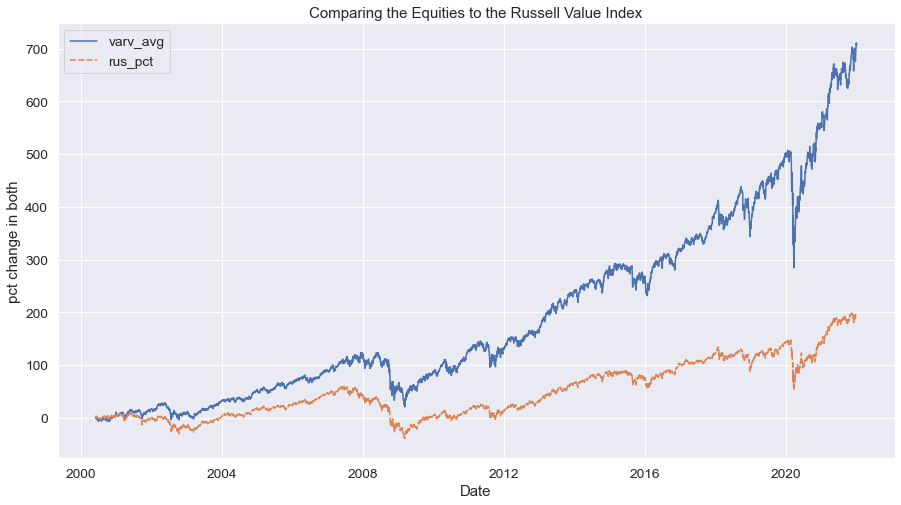

In [502]:
sns.set(font_scale = 1.25)
varv_c = sns.lineplot(data=varv).set(title='Comparing the Equities to the Russell Value Index',
                                     xlabel='Date',ylabel='pct change in both')

In [503]:
print('It appears that the selected equities performed better; meaning',
     "{}%".format(round(((varv['varv_avg'][0] / varv['rus_pct'][0])-1)*100,2)),'better')

It appears that the selected equities performed better; meaning 255.77% better


**From Start Summary**

In [504]:
print('The below is how well the selected equities did compared to the indexes as a percent:','\n','\n',
    'SPY |',"{}%".format(round(((vasp['vasp_avg'][0] / vasp['spy_pct'][0])-1)*100,2)),'\n',
    'IWD |',"{}%".format(round(((varv['varv_avg'][0] / varv['rus_pct'][0])-1)*100,2))
     )

The below is how well the selected equities did compared to the indexes as a percent: 
 
 SPY | 95.39% 
 IWD | 255.77%


**COVID Crisis Resurgence**

The next step would be to see how they performed since the bottom of the COVID crisis. They had the same dates as per below:

    * SPY | 23 Mar 2020
    * IWD | 23 Mar 2020
    
Given the comparatively higher change with `IWD` I am inclined to start with it.

In [505]:
# I know what needs to be dropped so I will start there
df_l_yr_t = pd.DataFrame([])
df_l_yr_t = df_l_yr.copy()

# Yup! Setting up a new dataframe w/out the ones that cause issues
df_l_yr_t = df_l_yr_t[df_l_yr_t['symbol'] != 'WTRG']
df_l_yr_t = df_l_yr_t[df_l_yr_t['symbol'] != 'RRX']
df_l_yr_t = df_l_yr_t[df_l_yr_t['symbol'] != 'J']

In [506]:
# checking if the two were removed
df_l_yr_t.tail(3)

,symbol,name,sector,industry,pct_ch_1990
43,LEG,"Leggett & Platt, Incorporated",Consumer Cyclical,"Furnishings, Fixtures & Appliances",1003.49
44,AVT,"Avnet, Inc.",Technology,Electronics & Computer Distribution,159.63
45,BOH,Bank of Hawaii Corporation,Financial Services,Banks—Regional,657.32


In [507]:
# this is the main dataframe for the equities structured against the SPY
eq_rus_covid = pd.DataFrame([])

for j in tqdm(range(0,len(df_l_yr_t))):
    # getting the data from investpy but I will always start with a clean one
    tick_df = pd.DataFrame([])
    tick_df = investpy.stocks.get_stock_historical_data(stock=df_l_yr_t.symbol[j], country='United States',
                                              from_date='23/03/2020', to_date='31/12/2021',
                                              as_json=False, order='descending', interval='Daily')
    tick_df = tick_df.drop(columns=['Open','High','Low','Volume','Currency'])

    # setting up the comparison number
    tick_df_st = tick_df.Close[len(tick_df)-1]

    tick_pct = []

    for i in range(0,len(tick_df)-1):
        t_pct = 0
        t_pct = ((tick_df['Close'][i] / tick_df_st)-1)*100
        tick_pct.append(t_pct)
    tick_pct.append(0)

    # this is the symbol to add to the dataframe column alongside "pct"
    tick_df_s = df_l_yr_t.symbol[j]
    tick_df[tick_df_s+'_pct'] = tick_pct
    tick_df = tick_df.drop(columns='Close')

    # putting the data into the main dataframe
    eq_rus_covid[tick_df_s+'_pct'] = tick_df[tick_df_s+'_pct']

100%|██████████| 46/46 [01:30<00:00,  1.97s/it]


In [508]:
eq_rus_covid_T = eq_rus_covid.T
eq_rus_covid_T.head(1)

Date,2021-12-31,2021-12-30,2021-12-29,2021-12-28,2021-12-27,2021-12-23,2021-12-22,2021-12-21,2021-12-20,2021-12-17,...,2020-04-03,2020-04-02,2020-04-01,2020-03-31,2020-03-30,2020-03-27,2020-03-26,2020-03-25,2020-03-24,2020-03-23
ADP_pct,126.074998,125.139818,127.386082,125.607408,125.809113,121.87586,117.86009,112.661593,110.286972,110.332814,...,17.878427,20.610617,18.932795,25.314019,26.359219,20.454754,25.662419,12.395709,10.901256,0.0


In [509]:
eq_rus_covid_T.tail(1)

Date,2021-12-31,2021-12-30,2021-12-29,2021-12-28,2021-12-27,2021-12-23,2021-12-22,2021-12-21,2021-12-20,2021-12-17,...,2020-04-03,2020-04-02,2020-04-01,2020-03-31,2020-03-30,2020-03-27,2020-03-26,2020-03-25,2020-03-24,2020-03-23
BOH_pct,76.820773,77.074098,78.024066,77.70741,77.559637,75.955246,74.519738,73.464218,69.199916,70.550982,...,14.545071,18.091619,11.631834,16.613891,14.355077,12.159595,19.337133,8.929702,9.35191,0.0


In [510]:
# checking that it worked
eq_rus_covid_n = pd.DataFrame(eq_rus_covid.isna().sum())
eq_rus_covid_n.columns = ['is_na']

In [511]:
eq_rus_covid_n[eq_rus_covid_n['is_na']>0].count()

is_na    0
dtype: int64

In [512]:
eq_rus_covid_n[eq_rus_covid_n['is_na']>0].max()

is_na   NaN
dtype: float64

In [513]:
eq_rus_covid_n[eq_rus_covid_n['is_na']>0].max() / len(eq_rus_covid)

is_na   NaN
dtype: float64

No `nan`'s; now too add the below back in with `yfinance`.

    * WTRG
    * RRX
    * J

WTRG will go first.

In [514]:
# setting up the dataframe
WTRG_str = 'WTRG'
WTRG_russ_covid_t = yf.Ticker(WTRG_str)
WTRG_russ_covid_yf = WTRG_russ_covid_t.history(start="2020-03-23", end="2021-12-31", interval="1D")

# cleaning it
WTRG_russ_covid_yf = WTRG_russ_covid_yf.drop(columns=['Open','High','Low','Volume','Dividends','Stock Splits'])
WTRG_russ_covid_yf = WTRG_russ_covid_yf[::-1]

# the first observation to be used as a comparison
WTRG_russ_covid_st = WTRG_russ_covid_yf.Close[len(WTRG_russ_covid_yf)-1]

In [515]:
# this is the loop to pull the data to be added in
tick_pct = []

for i in tqdm(range(0,len(WTRG_russ_covid_yf)-1)):
    t_pct = 0
    t_pct = ((WTRG_russ_covid_yf['Close'][i] / WTRG_russ_covid_st)-1)*100
    tick_pct.append(t_pct)
tick_pct.append(0)

100%|██████████| 448/448 [00:00<00:00, 109158.14it/s]


In [516]:
# bringing it in
WTRG_russ_covid_yf[WTRG_str+'_pct'] = tick_pct

# dropping Close
WTRG_russ_covid_yf = WTRG_russ_covid_yf.drop(columns=['Close'])
WTRG_russ_covid_yf.tail(2)

,WTRG_pct
Date,
2020-03-24,12.067372
2020-03-23,0.000000


RRX next.

In [517]:
# setting up the dataframe
RRX_str = 'RRX'
RRX_russ_covid_t = yf.Ticker(RRX_str)
RRX_russ_covid_yf = RRX_russ_covid_t.history(start="2020-03-23", end="2021-12-31", interval="1D")

# cleaning it
RRX_russ_covid_yf = RRX_russ_covid_yf.drop(columns=['Open','High','Low','Volume','Dividends','Stock Splits'])
RRX_russ_covid_yf = RRX_russ_covid_yf[::-1]

# the first observation to be used as a comparison
RRX_russ_covid_st = RRX_russ_covid_yf.Close[len(RRX_russ_covid_yf)-1]

In [518]:
# this is the loop to pull the data to be added in
tick_pct = []

for i in tqdm(range(0,len(RRX_russ_covid_yf)-1)):
    t_pct = 0
    t_pct = ((RRX_russ_covid_yf['Close'][i] / RRX_russ_covid_st)-1)*100
    tick_pct.append(t_pct)
tick_pct.append(0)

100%|██████████| 448/448 [00:00<00:00, 145911.49it/s]


In [519]:
# bringing it in
RRX_russ_covid_yf[RRX_str+'_pct'] = tick_pct

# dropping Close
RRX_russ_covid_yf = RRX_russ_covid_yf.drop(columns=['Close'])
RRX_russ_covid_yf.tail(2)

,RRX_pct
Date,
2020-03-24,7.585168
2020-03-23,0.000000


In [520]:
RRX_russ_covid_yf.head(2)

,RRX_pct
Date,
2021-12-30,243.018762
2021-12-29,244.593907


J to finish it off.

In [521]:
# setting up the dataframe
j_str = 'J'
j_russ_covid_t = yf.Ticker(j_str)
j_russ_covid_yf = j_russ_covid_t.history(start="2020-03-23", end="2021-12-31", interval="1D")

# cleaning it
j_russ_covid_yf = j_russ_covid_yf.drop(columns=['Open','High','Low','Volume','Dividends','Stock Splits'])
j_russ_covid_yf = j_russ_covid_yf[::-1]

# the first observation to be used as a comparison
j_russ_covid_st = j_russ_covid_yf.Close[len(j_russ_covid_yf)-1]

In [522]:
# this is the loop to pull the data to be added in
tick_pct = []

for i in tqdm(range(0,len(j_russ_covid_yf)-1)):
    t_pct = 0
    t_pct = ((j_russ_covid_yf['Close'][i] / j_russ_covid_st)-1)*100
    tick_pct.append(t_pct)
tick_pct.append(0)

100%|██████████| 448/448 [00:00<00:00, 127048.56it/s]


In [523]:
# bringing it in
j_russ_covid_yf[j_str+'_pct'] = tick_pct

# dropping Close
j_russ_covid_yf = j_russ_covid_yf.drop(columns=['Close'])
j_russ_covid_yf.tail(2)

,J_pct
Date,
2020-03-24,10.284072
2020-03-23,0.000000


Sending them in.

In [524]:
eq_rus_covid['WTRG_pct'] = WTRG_russ_covid_yf['WTRG_pct']
eq_rus_covid['RRX_pct'] = RRX_russ_covid_yf['RRX_pct']
eq_rus_covid['J_pct'] = j_russ_covid_yf['J_pct']

In [525]:
print('',eq_rus_covid['WTRG_pct'].isna().sum(),'| WTRG null\'s','\n',
eq_rus_covid['RRX_pct'].isna().sum(),'| RRX null\'s','\n',
eq_rus_covid['J_pct'].isna().sum(),'| J null\'s')

 1 | WTRG null's 
 1 | RRX null's 
 1 | J null's


In [526]:
eq_rus_covid['WTRG_pct'].head(2)

Date
2021-12-31          NaN
2021-12-30    70.287306
Name: WTRG_pct, dtype: float64

In [527]:
eq_rus_covid['RRX_pct'].head(2)

Date
2021-12-31           NaN
2021-12-30    243.018762
Name: RRX_pct, dtype: float64

In [528]:
eq_rus_covid['J_pct'].head(2)

Date
2021-12-31           NaN
2021-12-30    123.245785
Name: J_pct, dtype: float64

Been here before.

In [529]:
eq_rus_covid['WTRG_pct'] = eq_rus_covid['WTRG_pct'].fillna(method='bfill')
eq_rus_covid['RRX_pct'] = eq_rus_covid['RRX_pct'].fillna(method='bfill')
eq_rus_covid['J_pct'] = eq_rus_covid['J_pct'].fillna(method='bfill')

In [530]:
print('',eq_rus_covid['WTRG_pct'].isna().sum(),'| WTRG null\'s','\n',
eq_rus_covid['RRX_pct'].isna().sum(),'| RRX null\'s','\n',
eq_rus_covid['J_pct'].isna().sum(),'| J null\'s')

 0 | WTRG null's 
 0 | RRX null's 
 0 | J null's


Alright, there is now a complete dataframe. An equally weighted average for all will be used to compare.

It needs a unique & short name, similar to `SPY` & `IWD`. I will call it `COVID_IWD` standing for:

    * COVID_IWD | COVID vs IWD

Because why not.

In [531]:
covid_iwd = pd.DataFrame([])
covid_iwd = eq_rus_covid.copy()

In [532]:
covid_iwd['select_eq_covid_avg'] = covid_iwd.mean(axis=1)
covid_iwd['select_eq_covid_avg'].head(3)

Date
2021-12-31    112.551546
2021-12-30    111.847508
2021-12-29    112.768744
Name: select_eq_covid_avg, dtype: float64

In [533]:
print(covid_iwd['select_eq_covid_avg'].isna().sum(),'| Checking for nulls')

0 | Checking for nulls


Now making that column the only column for the `vasp` dataframe.

In [534]:
covid_iwd = pd.DataFrame(covid_iwd['select_eq_covid_avg'])

In [535]:
covid_iwd.tail(2)

,select_eq_covid_avg
Date,
2020-03-24,11.361242
2020-03-23,0.000000


Adding in the `IWD` data

In [536]:
r_covid_df = investpy.get_etf_historical_data(etf='iShares Russell 1000 Value', country='United States',
                                        from_date='23/03/2020', to_date='31/12/2021')
r_covid_df = r_covid_df[::-1]
r_covid_df = r_covid_df.drop(columns=['Open','High','Low','Volume','Currency','Exchange'])
r_covid_df.tail(3)

,Close
Date,
2020-03-25,95.32
2020-03-24,93.93
2020-03-23,85.17


In [537]:
# this will be the main depository
pct_covid_rus = []

# re-establishing the first observation to compare too here it has been reversed ( same # as before )
rus_covid_s = r_v_df['Close'][int(len(r_covid_df)-1)]

for i in tqdm(range(0,len(r_covid_df)-1)):
    
    rus_pct = 0
    rus_pct = (( r_covid_df['Close'][i] / rus_covid_s )-1)*100

    pct_covid_rus.append(rus_pct)

pct_covid_rus.append(0)

100%|██████████| 476/476 [00:00<00:00, 221266.62it/s]


In [538]:
r_covid_df['rus_covid_avg'] = pct_covid_rus

In [539]:
r_covid_df.head(2)

,Close,rus_covid_avg
Date,,
2021-12-31,167.93,97.170365
2021-12-30,167.97,97.217330


In [540]:
r_covid_df = r_covid_df.drop(columns=['Close'])
r_covid_df.head(2)

,rus_covid_avg
Date,
2021-12-31,97.170365
2021-12-30,97.217330


In [541]:
r_covid_df.tail(2)

,rus_covid_avg
Date,
2020-03-24,10.285312
2020-03-23,0.000000


Now adding in the `IWD` data

In [542]:
covid_iwd['rus_covid_avg'] = r_covid_df['rus_covid_avg']
covid_iwd.head(2)

,select_eq_covid_avg,rus_covid_avg
Date,,
2021-12-31,112.551546,97.170365
2021-12-30,111.847508,97.217330


In [543]:
covid_iwd.tail(2)

,select_eq_covid_avg,rus_covid_avg
Date,,
2020-03-24,11.361242,10.285312
2020-03-23,0.000000,0.000000


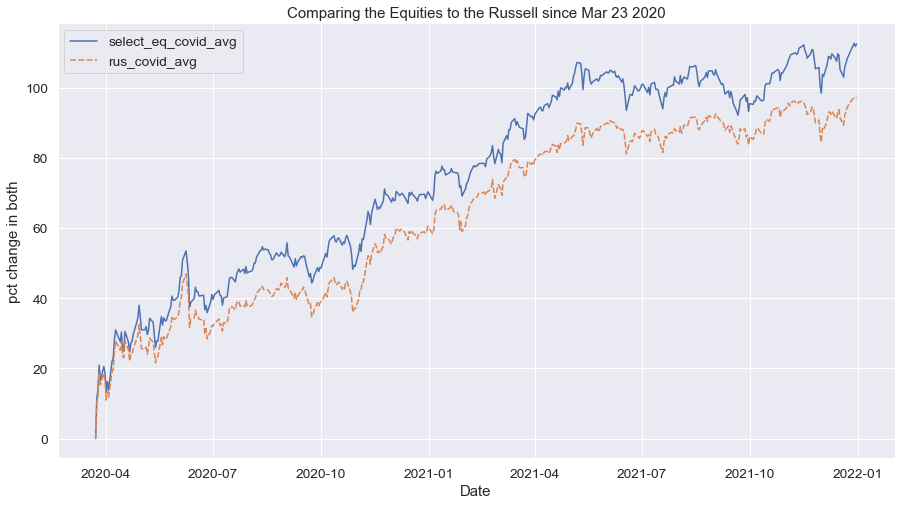

In [544]:
sns.set(font_scale = 1.25)
covid_iwd_c = sns.lineplot(data=covid_iwd).set(title='Comparing the Equities to the Russell since Mar 23 2020',
                                     xlabel='Date',ylabel='pct change in both')

In [545]:
print('It appears that the selected equities performed better; meaning',
     "{}%".format(round(((covid_iwd['select_eq_covid_avg'][0] / covid_iwd['rus_covid_avg'][0])-1)*100,2)),'better')

It appears that the selected equities performed better; meaning 15.83% better


**SPY Addition**

Now to add the `SPY` to the mix.

In [546]:
spy_covid_df = investpy.get_etf_historical_data(etf='SPDR S&P 500', country='United States',
                                        from_date='23/03/2020', to_date='31/12/2021')
spy_covid_df = spy_covid_df[::-1]
spy_covid_df = spy_covid_df.drop(columns=['Open','High','Low','Volume','Currency','Exchange'])
spy_covid_df.tail(3)

,Close
Date,
2020-03-25,246.79
2020-03-24,243.15
2020-03-23,222.95


In [547]:
# this will be the main depository
pct_covid_spy = []

# re-establishing the first observation to compare too here it has been reversed ( same # as before )
spy_covid_s = spy_covid_df['Close'][int(len(spy_covid_df)-1)]

for i in tqdm(range(0,len(spy_covid_df)-1)):
    
    spy_pct = 0
    spy_pct = (( spy_covid_df['Close'][i] / spy_covid_s )-1)*100

    pct_covid_spy.append(spy_pct)

pct_covid_spy.append(0)

100%|██████████| 454/454 [00:00<00:00, 150960.36it/s]


In [548]:
spy_covid_df['spy_covid_avg'] = pct_covid_spy
spy_covid_df = spy_covid_df.drop(columns=['Close'])

In [549]:
spy_covid_df.head(2)

,spy_covid_avg
Date,
2021-12-31,113.034313
2021-12-30,113.572550


In [550]:
spy_covid_df.tail(2)

,spy_covid_avg
Date,
2020-03-24,9.060327
2020-03-23,0.000000


Confirming they look correct.

In [551]:
round(((474.96 / 222.95)-1)*100,6)

113.034313

In [552]:
round(((476.16 / 222.95)-1)*100,6)

113.57255

Checking to see if they are the same length.

In [553]:
print('Checking to see if they are the same length :','\n','\n',
     len(spy_covid_df),'| SPY','\n',
     len(covid_iwd),'| Main dataframe')

Checking to see if they are the same length : 
 
 455 | SPY 
 450 | Main dataframe


This is odd. Let's see if they both start on the same day.

In [554]:
covid_iwd.tail(2)

,select_eq_covid_avg,rus_covid_avg
Date,,
2020-03-24,11.361242,10.285312
2020-03-23,0.000000,0.000000


In [555]:
spy_covid_df.tail(2)

,spy_covid_avg
Date,
2020-03-24,9.060327
2020-03-23,0.000000


Sill odd. Let's see if they both end on the same day.

In [556]:
covid_iwd.head(2)

,select_eq_covid_avg,rus_covid_avg
Date,,
2021-12-31,112.551546,97.170365
2021-12-30,111.847508,97.217330


In [557]:
spy_covid_df.head(2)

,spy_covid_avg
Date,
2021-12-31,113.034313
2021-12-30,113.572550


In [558]:
print(' They are all traded on the same exchange, so this is certainly odd. The difference represents',
     "{}%".format(round((((len(spy_covid_df)-len(covid_iwd))/len(spy_covid_df)))*100,2)),'extra on the SPY','\n','\n',
     'The first step is to find these',(len(spy_covid_df)-len(covid_iwd)))

 They are all traded on the same exchange, so this is certainly odd. The difference represents 1.1% extra on the SPY 
 
 The first step is to find these 5


In [559]:
# setting up a side dataframe for exploration
spy_covid_df_side = pd.DataFrame([])
spy_covid_df_side = spy_covid_df.copy()

# pulling out the Date index for more review
spy_covid_df_side = spy_covid_df_side.reset_index()
spy_covid_df_side.head(1)

,Date,spy_covid_avg
0,2021-12-31,113.034313


In [560]:
# checking for duplicates in the Data column
spy_covid_df_side['date_dup'] = spy_covid_df_side['Date'].duplicated()
spy_covid_df_side.head()

,Date,spy_covid_avg,date_dup
0,2021-12-31,113.034313,False
1,2021-12-30,113.572550,False
2,2021-12-29,114.164611,False
3,2021-12-28,113.891007,False
4,2021-12-27,114.065934,False


In [561]:
# checking if there are any duplicates here
spy_covid_df_side['date_dup'].sum()

0

In [562]:
# a bit odd but checking if there are any duplicates here
spy_covid_df_side['pct_dup'] = spy_covid_df_side['spy_covid_avg'].duplicated()
spy_covid_df_side['pct_dup'].sum()

14

Although duplicates in the `spy_covid_avg` column is a "little" odd, it certainly can happen. The duplicates would appear in the `Date` column to be the definitive observation but there are none.

The next step is to identify the differences between the `spy_covid_df_side` & `covid_iwd` dataframes. This said, the `covid_iwd` dataframe needs a new name. I will setup a "side" dataframe before setting up the final one.

In [563]:
# setting up the new side dataframe 
main_df_side = pd.DataFrame([])
main_df_side = covid_iwd.copy()

# resetting the index to also pull out the date
main_df_side = main_df_side.reset_index()
main_df_side.head(2)

,Date,select_eq_covid_avg,rus_covid_avg
0,2021-12-31,112.551546,97.170365
1,2021-12-30,111.847508,97.217330


In [564]:
# asking the obvious question
spy_covid_df_side['Date'].equals(main_df_side['Date'])

False

In [565]:
set(spy_covid_df_side.Date).symmetric_difference(main_df_side.Date)

{Timestamp('2021-07-03 00:00:00'),
 Timestamp('2021-07-04 00:00:00'),
 Timestamp('2021-07-05 00:00:00'),
 Timestamp('2021-08-07 00:00:00'),
 Timestamp('2021-08-08 00:00:00')}

Lets see what week days those are.

In [566]:
# sending them to a set
wd = set(spy_covid_df_side.Date).symmetric_difference(main_df_side.Date)

# sending them to a dataframe
wd_df = pd.DataFrame([wd]).T
wd_df.columns = ['wk_day']
wd_df['weekday'] = wd_df['wk_day'].dt.dayofweek
wd_df

,wk_day,weekday
0,2021-07-05,0
1,2021-07-04,6
2,2021-08-07,5
3,2021-08-08,6
4,2021-07-03,5


The **`pandas` datatime starts the week off on Monday as a 0, thus 5 & 6 are weekends** when trading doesn't happen.

**All but 2021-07-05 can be deleted** but **I double confirmed that 2021-07-05 was a holiday; Independence Day in lieu of July 4th being a weekend.**

Therefore, **all can be dropped.**

In [567]:
len(spy_covid_df_side)

455

In [568]:
# a for loop is more appropriate but I just want the results
spy_covid_df_side = spy_covid_df_side[spy_covid_df_side.Date != wd_df['wk_day'][0]]
spy_covid_df_side = spy_covid_df_side[spy_covid_df_side.Date != wd_df['wk_day'][1]]
spy_covid_df_side = spy_covid_df_side[spy_covid_df_side.Date != wd_df['wk_day'][2]]
spy_covid_df_side = spy_covid_df_side[spy_covid_df_side.Date != wd_df['wk_day'][3]]
spy_covid_df_side = spy_covid_df_side[spy_covid_df_side.Date != wd_df['wk_day'][4]]

In [569]:
len(spy_covid_df_side)

450

Viola. Let's now bring them all together.

In [570]:
# remember this one?
covid_iwd.head(1)

,select_eq_covid_avg,rus_covid_avg
Date,,
2021-12-31,112.551546,97.170365


In [571]:
spy_covid_df_side.head(1)

,Date,spy_covid_avg,date_dup,pct_dup
0,2021-12-31,113.034313,False,False


In [572]:
# putting it together to be added w/ the covid_iwd dataframe
spy_covid_df_side = spy_covid_df_side.set_index('Date')
spy_covid_df_side = spy_covid_df_side.drop(columns=['date_dup','pct_dup'])
spy_covid_df_side.head(2)

,spy_covid_avg
Date,
2021-12-31,113.034313
2021-12-30,113.572550


Now, all together.

In [573]:
df_main = pd.DataFrame([])
df_main = covid_iwd.copy()
df_main['spy_covid_avg'] = spy_covid_df_side['spy_covid_avg']
df_main.head(3)

,select_eq_covid_avg,rus_covid_avg,spy_covid_avg
Date,,,
2021-12-31,112.551546,97.170365,113.034313
2021-12-30,111.847508,97.217330,113.572550
2021-12-29,112.768744,97.346484,114.164611


Now for the visual

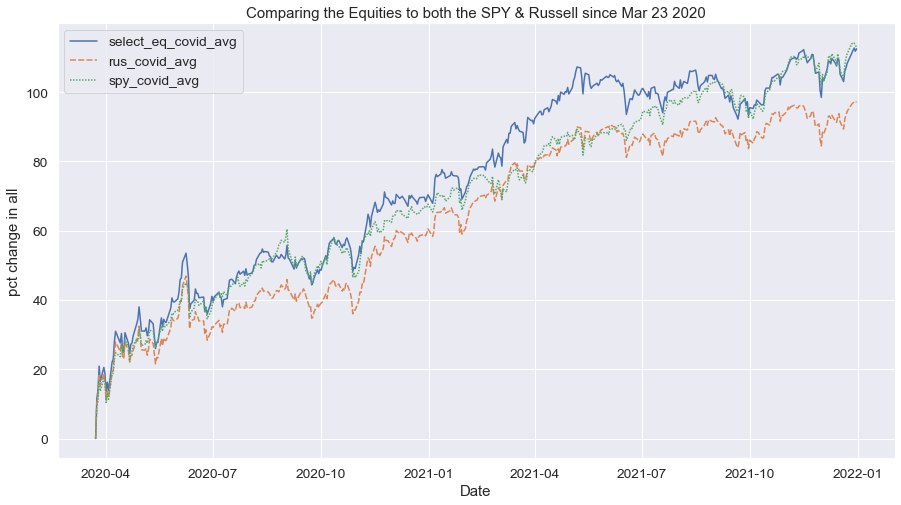

In [574]:
sns.set(font_scale = 1.25)
df_main_c = sns.lineplot(data=df_main).set(title='Comparing the Equities to both the SPY & Russell since Mar 23 2020',
                                     xlabel='Date',ylabel='pct change in all')

In [575]:
rus_outcome = round(((df_main['select_eq_covid_avg'][0] / df_main['rus_covid_avg'][0])-1)*100)
spy_outcome = round(((df_main['select_eq_covid_avg'][0] / df_main['spy_covid_avg'][0])-1)*100)

print(' The selected equities performed as such; they ended the year','\n','\n',
     "{}%".format(rus_outcome),'| Above Russell 1000 Value ETF','\n',
     "{}%".format(spy_outcome),'| More the SPY')

 The selected equities performed as such; they ended the year 
 
 16% | Above Russell 1000 Value ETF 
 0% | More the SPY


**Conclusion**

In [576]:
# pulling in the start date for the SPY & IWD
vasp_end_d = vasp.reset_index().copy()
vasp_end_date = str(vasp_end_d.Date[len(vasp)-1])
russ_end_d = r_v_df.reset_index().copy()
russ_end_date = str(russ_end_d.Date[len(russ_end_d)-1])

print('A recap of what has been witness herein:','\n','\n',
     "{}%".format(round(((vasp['vasp_avg'][0] / vasp['spy_pct'][0])-1)*100,0)),
      '| Above the SPY since its inception in',vasp_end_date[0:10],'\n',
     "{}%".format(round(((varv['varv_avg'][0] / varv['rus_pct'][0])-1)*100,0)),
      '| Above the IWD since its inception in',russ_end_date[0:10],
     '\n','\n',
     "{}%".format(spy_outcome),'|  Less the SPY since the COVID bottom in 23 Mar 2020','\n',
      "{}%".format(rus_outcome),'| Above the IWD since the COVID bottom in 23 Mar 2020'
     )

A recap of what has been witness herein: 
 
 95.0% | Above the SPY since its inception in 1993-02-01 
 256.0% | Above the IWD since its inception in 2000-05-30 
 
 0% |  Less the SPY since the COVID bottom in 23 Mar 2020 
 16% | Above the IWD since the COVID bottom in 23 Mar 2020


This is fairly impressive. Please note, the Selected Equities:

    * Performed better than the IWD throughout the COVID period
    * ~40% of the time better than the SPY but certainly ended the year lower during the the COVID period

Further to this, all three pay dividends. I would like to review how this affects the above results. In addition, a closer look at what drove the Selected Equities from both a Equity & Indsutry perspective. I could also do the same for the `SPY` & `IWD`.

In [577]:
print('The only two (2) successes I can take from this exercise are as below:','\n','\n',
     '1. I found',len(df_l_yr),'those that never decrease their dividends since 1990','\n',
     '2. If you want to invest in Value, there are',len(df_l_yr),'equities that can give you a better return than the IWD & SPY',
     '\n','   throughout their respective tenures')

The only two (2) successes I can take from this exercise are as below: 
 
 1. I found 46 those that never decrease their dividends since 1990 
 2. If you want to invest in Value, there are 46 equities that can give you a better return than the IWD & SPY 
    throughout their respective tenures
